In [ ]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable
import plotly.express as px
import scipy.stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
import plotly.offline as pyo
pyo.init_notebook_mode()

#  Business problem

   The objective of this study is to make prediction of asteroid diameter with the use of machine learning algorithms.

   Knowledge of asteroid diameters is crucial to understand and study their dynamical and morphological evolution and most importantly because of their impact threat. There are different ways in which we can determine the size of asteroid. One way is space mission to take pictures of these asteroids. e.g. the Dawn mission. This is very expensive. Other method is based on Infrared radiation and lots of assumptions, measuring the brightness of asteroids. Then there is Occulatation method

Majority of asteroid diameters are derived from their absolute magnitude.
```
The problem is that an asteroid’s apparent brightness is a complicated function of the observing geometry, their irregular shapes, rotation phase, albedo, lack of atmosphere, and their rough, regolith-covered surfaces. Most of these data are unknown for most asteroids.

Reference: Precise astrometry and diameters of asteroids from occultations – a data-set of observations and their interpretation Oct Preprint 2020, https://arxiv.org/pdf/2010.06086.pdf
```

There are many studies available online which tries to harness Machine learning algorithm to predict diameter. My effort here is to experiment for any improvisation, take a dive into the asteroid orbital and physical feature data available and to experiment and harness how well we can predict the diameter

# Dataset

For this Case study, I have sourced latest data from JPL using Small-Body Database Query. Sourced time: 22/06/2022 9:11 AM IST

Data Sourcing:
- Tool: Small-Body Database Query tool: https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results
- Applied below Limits:
  - Limit by Object Kind/group - limited by object Kind - 'asteroid'
  - Limit by Orbit class - default selection
  - Custom Object/Orbit constraint - 
    - Field group - Physical parameters fields
    - parameter - 'diameter'
    - constraint - 'is defined'
  - Output Selection Controls - Selected output fields(as seen in the dataset used in this Case Study)

- Dataset link - Kaggle link (I have not yet uploaded to kaggle)

***Links to direct data resource:***
- Source: [Jet Propulsion Laboratory, California Institute of Technology](https://ssd.jpl.nasa.gov/)
- Tool: Small-Body Database Query: https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results



---

*Links to other available Datasets:*
1. Asteroid.csv: https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid.csv
2. Asteroid_Updated.csv: https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid.csv





```
If you would like to play with the Query tool, briefing here the steps I followed:
- Limit by Object Kind/group: limited by object Kind - 'asteroid'
- Limit by Orbit class: default selection
- Custom Object/Orbit constraint: Field group - 'Physical parameters', fields parameter - 'diameter' and constraint - 'is defined'
- Output Selection Controls: Selected output fields(ignored the comet-specific fields and any redundant info fields)
- 'Get Results' option would get result in a tabular form, which you can download in .csv format
```



## Loading Data into Pandas dataframe

In [ ]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/project_asteroid/asteroids_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (1,7,14,15) have mixed types.Specify dtype option on import or set low_memory=False.



Here we see a warning thrown - "DtypeWarning: Columns (1,7,14,15) have mixed types." We would address this as part of Data cleaning

# Exploratory Data Analysis(EDA) 
### Note As we progress through our EDA, we would also do some very basic **Data Cleaning steps**  e.g, removing duplicate  rows, or handling dtype inconsistencies or dropping obviously irrelevant features. I would say, we can  call this stage as Data Preprocessing Level I


  - Data Statistic Summary
      - Looking at first and last rows of Data
      - Data shape
      - Data columns and information
      - Data statistic using describe
  - Basic Data Cleaning
      - Checking and handling dtype inconsistencies
      - Checking and handling for Duplicates
  - Missing value analysis
      - Graphical analysis
      - Statistical analysis
  - Domain specific feature analysis
      - feature relevance analysis based on domain specific information
  - Visualization based analysis
      - Univariate analysis
        - Target Variable Distribution
        - Independent Variable Distribution
        - Variance study
      - Bivariate analysis
        - Independent Variable with the target Variable
      - Multivariate analysis
        - Correlation study
        - Cluster

At the end of every analysis type, we have:
 - Observations & Insights
 - Decisions

** Some decision action will be part of Data Preprocessing level II

## Data Statistics Summary

In [ ]:
# looking at the data shape

print(df.shape)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

(139708, 37)
There are 139708 rows and 37 columns


In [ ]:
df.head()

full_name     name neo pha     H     G  diameter  \
0         1 Ceres (A801 AA)    Ceres   N   N  3.33  0.12   939.400   
1        2 Pallas (A802 FA)   Pallas   N   N  4.11  0.11   513.000   
2          3 Juno (A804 RA)     Juno   N   N  5.12  0.32   246.596   
3         4 Vesta (A807 FA)    Vesta   N   N  3.20  0.32   525.400   
4       5 Astraea (A845 XA)  Astraea   N   N  7.01   NaN   106.699   

                  extent  albedo    rot_per  ...       n          tp     per  \
0  964.4 x 964.2 x 891.8  0.0900   9.074170  ...  0.2142  2459920.37  1680.0   
1            568x532x448  0.1550   7.813221  ...  0.2139  2460010.50  1680.0   
2                    NaN  0.2140   7.210000  ...  0.2259  2460036.83  1590.0   
3  572.6 x 557.2 x 446.4  0.4228   5.342128  ...  0.2715  2459575.12  1330.0   
4                    NaN  0.2740  16.806000  ...  0.2382  2460436.30  1510.0   

   per_y  moid moid_jup  class  data_arc  condition_code      rms  
0   4.60  1.59     2.09    MBA    9520.0               0  0.43153  
1   4.61  1.23     1.85    MBA   79390.0               0  0.35570  
2   4.36  1.04     2.19    MBA   79466.0               0  0.34530  
3   3.63  1.14     2.47    MBA   25743.0               0  0.40095  
4   4.14  1.10     1.96    MBA   64243.0               0  0.52133  

[5 rows x 37 columns]

In [ ]:
df.tail()

full_name name neo pha      H   G  diameter extent  albedo  \
139703         (2019 AR40)  NaN   N   N  18.30 NaN     1.870    NaN   0.073   
139704          (2019 BY5)  NaN   N   N  17.10 NaN     2.182    NaN   0.054   
139705          (2019 BX6)  NaN   N   N  17.45 NaN     1.688    NaN     NaN   
139706          (2019 BB7)  NaN   N   N  16.80 NaN     2.887    NaN   0.111   
139707          (2019 EJ2)  NaN   N   N  17.40 NaN     2.226    NaN   0.074   

        rot_per  ...       n          tp     per  per_y   moid moid_jup  \
139703      NaN  ...  0.2171  2460389.46  1660.0   4.54  1.120     1.82   
139704      NaN  ...  0.2200  2459982.46  1640.0   4.48  0.985     2.01   
139705      NaN  ...  0.2245  2459941.00  1600.0   4.39  1.060     2.11   
139706      NaN  ...  0.2117  2460429.02  1700.0   4.66  1.360     1.77   
139707      NaN  ...  0.2185  2460092.67  1650.0   4.51  1.120     1.93   

        class  data_arc  condition_code      rms  
139703    MBA    6557.0               1  0.52751  
139704    MBA    3763.0               0  0.42858  
139705    MBA    7084.0               0  0.46238  
139706    MBA    4704.0               0  0.51827  
139707    MBA    5246.0               0  0.52810  

[5 rows x 37 columns]

In [ ]:
# the variaous columns we have in our dataset
df.columns

Index(['full_name', 'name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T',
       'H_sigma', 'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class',
       'data_arc', 'condition_code', 'rms'],
      dtype='object')

In [ ]:
# summary of dtypes
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139708 entries, 0 to 139707
Columns: 37 entries, full_name to rms
dtypes: float64(28), int64(1), object(8)
memory usage: 39.4+ MB


In [ ]:
# detailed infoabout each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139708 entries, 0 to 139707
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       139708 non-null  object 
 1   name            15984 non-null   object 
 2   neo             139708 non-null  object 
 3   pha             139708 non-null  object 
 4   H               138594 non-null  float64
 5   G               119 non-null     float64
 6   diameter        139708 non-null  float64
 7   extent          19 non-null      object 
 8   albedo          138569 non-null  float64
 9   rot_per         19264 non-null   float64
 10  GM              15 non-null      float64
 11  BV              1007 non-null    float64
 12  UB              966 non-null     float64
 13  IR              1 non-null       float64
 14  spec_B          1414 non-null    object 
 15  spec_T          966 non-null     object 
 16  H_sigma         2631 non-null    float64
 17  diameter_s

In [ ]:
df.describe()

H           G       diameter         albedo       rot_per  \
count  138594.000000  119.000000  139708.000000  138569.000000  19264.000000   
mean       15.352342    0.179076       5.457189       0.130070     31.403305   
std         1.419058    0.133822       9.305528       0.110338     84.314215   
min         3.200000   -0.250000       0.002500       0.001000      0.008500   
25%        14.620000    0.100000       2.762000       0.053000      4.813625   
50%        15.440000    0.190000       3.948000       0.078000      8.263065   
75%        16.230000    0.250000       5.730000       0.188000     19.612975   
max        29.900000    0.600000     939.400000       1.000000   1880.000000   

                 GM           BV          UB    IR      H_sigma  ...  \
count  1.500000e+01  1007.000000  966.000000  1.00  2631.000000  ...   
mean   7.221682e+00     0.768836    0.364093 -0.33     0.305580  ...   
std    1.626088e+01     0.088303    0.095659   NaN     0.103657  ...   
min    2.100000e-09     0.580000    0.120000 -0.33     0.000000  ...   
25%    2.230161e-04     0.700000    0.289000 -0.33     0.240000  ...   
50%    4.910000e-01     0.743000    0.360000 -0.33     0.300000  ...   
75%    6.000000e+00     0.849500    0.438750 -0.33     0.360000  ...   
max    6.262840e+01     1.077000    0.655000 -0.33     0.810000  ...   

                  ad              n            tp           per  \
count  139708.000000  139708.000000  1.397080e+05  1.397080e+05   
mean        3.246343       0.218882  2.459732e+06  1.791538e+03   
std         2.888508       0.060228  6.642237e+02  9.304166e+03   
min         1.000000       0.000126  2.426218e+06  1.810000e+02   
25%         2.890000       0.180700  2.459349e+06  1.490000e+03   
50%         3.190000       0.214900  2.459750e+06  1.680000e+03   
75%         3.490000       0.242300  2.460178e+06  1.990000e+03   
max       781.390000       1.989000  2.468617e+06  2.850000e+06   

               per_y           moid       moid_jup       data_arc  \
count  139708.000000  139708.000000  139708.000000  139683.000000   
mean        4.905024       1.419095       2.049259   10156.767867   
std        25.478303       0.516136       0.478788    5945.925622   
min         0.496000       0.000109       0.000416       1.000000   
25%         4.070000       1.080000       1.800000    7297.000000   
50%         4.590000       1.390000       2.070000    8550.000000   
75%         5.450000       1.700000       2.350000   10729.000000   
max      7810.000000      39.400000      35.600000   79466.000000   

       condition_code            rms  
count   139708.000000  139708.000000  
mean         0.103122       0.519493  
std          0.877247       0.061549  
min          0.000000       0.055102  
25%          0.000000       0.485240  
50%          0.000000       0.519490  
75%          0.000000       0.553640  
max          9.000000       2.506000  

[8 rows x 29 columns]

In [ ]:
# comparing two features at random to take general overview on data variance
df[['a', 'e']].describe()

a              e
count  139708.000000  139708.000000
mean        2.823148       0.149425
std         1.518900       0.081682
min         0.626200       0.000600
25%         2.548000       0.091800
50%         2.760000       0.141800
75%         3.098000       0.194800
max       393.800000       0.984400

#### Observations & Insights
 - there are 139708 rows and 37 columns.
 - our dependent or target variable is the - 'diameter'.
 - data variables are of type float, int, and object type. Will be taking a deeper look into these in the following section.
    - (dtypes: float64(28), int64(1), object(8)) 
 - observed mixed type in some columns while creating dataframe("DtypeWarning: Columns (1,7,14,15) have mixed types"). This needs to be fixed
 - from data.describe() result, we observe that our independent variables variance vary a lot. The reason in general is varying - magnitude, units of measurement, context etc. This gives us a clear signal that we should normalize the data before feeding into the model. Lets look at some example cases here: 
    - compared min and max values for feature 'a' and feature 'e'
      - for 'a' - min value is 0.626200 and max value 393.800000	
      - for 'e' - min value is 0.000600 and max 0.984400 
    - another observation reg. distribution of 'a'
      - 75% of values are <=3.098000, while the max value being 393.800000, the data apears to be skewed
- there are many columns with missing data >90%.


## Basic Data Cleaning

### 1. Checking and handling dtype inconsistencies

a. "DtypeWarning: Columns (1,7,14,15)  have mixed types". Warning thrown at the time of DataFrame Creation. This need to be addressed

In [ ]:
# here is the list of problem columns
cols_with_mixed_dtype=df.columns[[1,7,14,15]].values
cols_with_mixed_dtype

array(['name', 'extent', 'spec_B', 'spec_T'], dtype=object)

In [ ]:
# looping through the problem columns and getting value counts for the dtypes
for i in cols_with_mixed_dtype:
    print(f"Column name: {i}")
    print(df[i].apply(type).value_counts())
    print()

Column name: name
<class 'float'>    123724
<class 'str'>       15984
Name: name, dtype: int64

Column name: extent
<class 'float'>    139689
<class 'str'>          19
Name: extent, dtype: int64

Column name: spec_B
<class 'float'>    138294
<class 'str'>        1414
Name: spec_B, dtype: int64

Column name: spec_T
<class 'float'>    138742
<class 'str'>         966
Name: spec_T, dtype: int64



In [ ]:
#lets check if these column are any way affected by missing data
for i in cols_with_mixed_dtype:
    print(f"Column name: {i}")
    print(df[i].isnull().sum())
    print()

Column name: name
123724

Column name: extent
139689

Column name: spec_B
138294

Column name: spec_T
138742



Problem seems to be missing values for these columns and hence we are getting mixed dtypes warning

b. Checking remaining Data features of dtype -object

In [ ]:
# check value dtypes in the features
for i in df.columns.values:
    if df[i].dtype=='object' and i not in ['full_name', 'name', 'extent', 'spec_B', 'spec_T']: 
        print(f"Column name: '{i}'")
        print(df[i].apply(type).unique())
        print(df[i].value_counts())
        print()


Column name: 'neo'
[<class 'str'>]
N    138460
Y      1248
Name: neo, dtype: int64

Column name: 'pha'
[<class 'str'>]
N    139367
Y       341
Name: pha, dtype: int64

Column name: 'class'
[<class 'str'>]
MBA    127600
OMB      7809
TJN      1880
APO       773
MCA       602
IMB       497
AMO       346
ATE       129
CEN        50
TNO        12
AST        10
Name: class, dtype: int64



- these are basically the group/membership feature set
- we observe that the features are categorical type of data

### 2. Checking and handling Duplicate rows

In [ ]:
# check for duplicates
df[df.duplicated()].shape

(0, 37)

- No duplicate row observed

### Observations & Insights
- features with mixed dtypes are - name, extent, spec_B, spec_T. the reason for mixed type is the missing data. we will dive deep more in missing value analysis step
- feature like 'name' do not add any meaning to diameter prediction modelling, so we can very well drop this field. 
- feature of dtype object looks good
- there are no duplicate rows

### Decisions:
- Drop feature 'name'
(Note: we have another similar feature - 'full_name', we keep this for now just out of interest during the EDA and Data preprocessing and imputation stages. Will drop this before modelling.

### Action - drop feature 'name'

In [ ]:
#creating a new dataframe called 'data' from the master dataframe 'df'
data = df.drop(['name'], axis=1)

# checking the shape
def dataset_shape():
    print("At this stage the DataFrame 'data' looks like this")
    x = PrettyTable()
    x.field_names =['# rows', '# cols']
    x.add_row([data.shape[0], data.shape[1]])
    print(x)
dataset_shape()

At this stage the DataFrame 'data' looks like this
+--------+--------+
| # rows | # cols |
+--------+--------+
| 139708 |   36   |
+--------+--------+


In [ ]:
data.columns

Index(['full_name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma',
       'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class', 'data_arc',
       'condition_code', 'rms'],
      dtype='object')

## Missing Value Analysis

### 1. Graphical Analysis

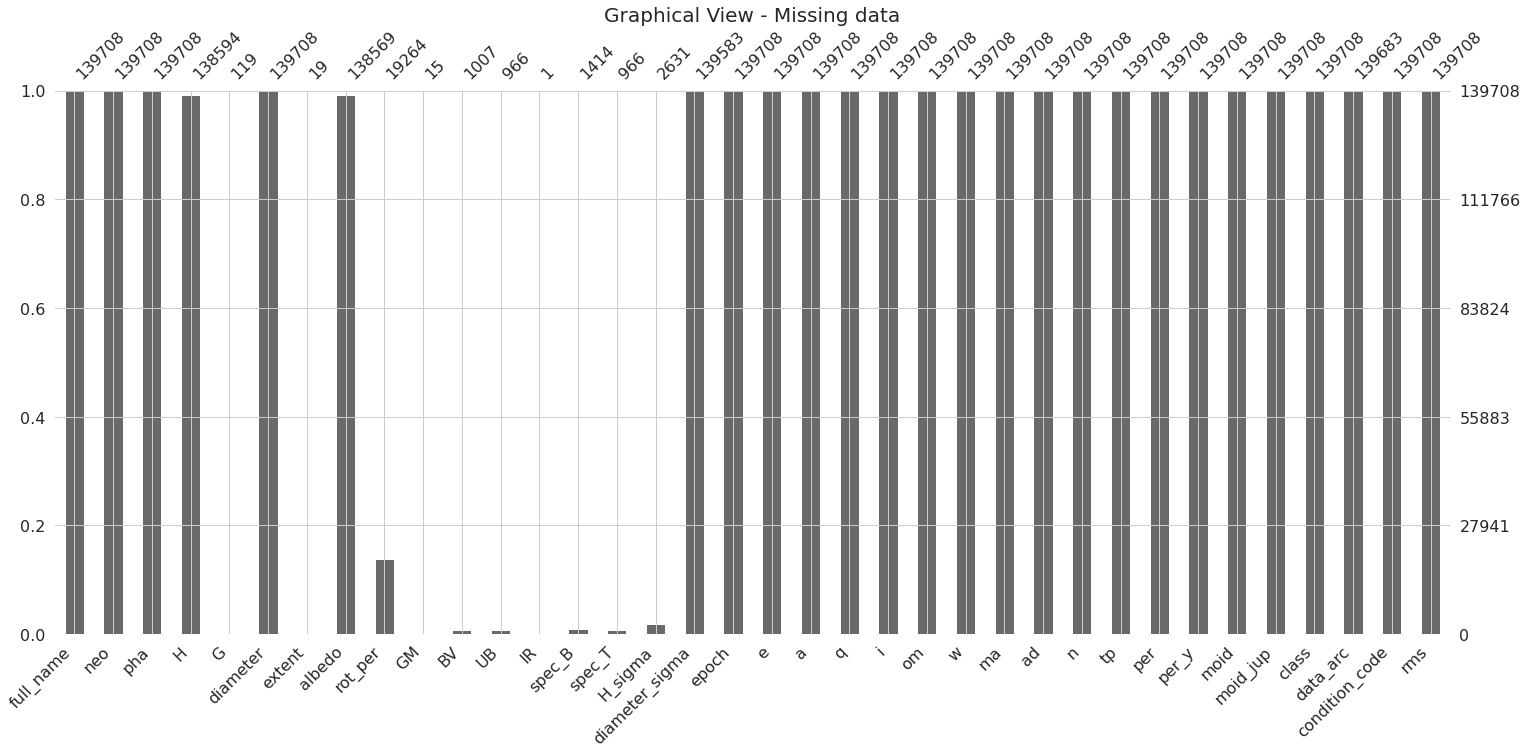

In [ ]:
# we have this missingno library which we can use to graphically look at the missing value status
# making use of python library missingno
msno.bar(data)
plt.title("Graphical View - Missing data", size=20)
plt.grid()
plt.show()

Observations:
  - features IR, GM, extent, G, UB, spec_T, BV, spec_B, H_sigma, rot_per are missing in high percentage

Lets look we can find any missing patterns - 

[]

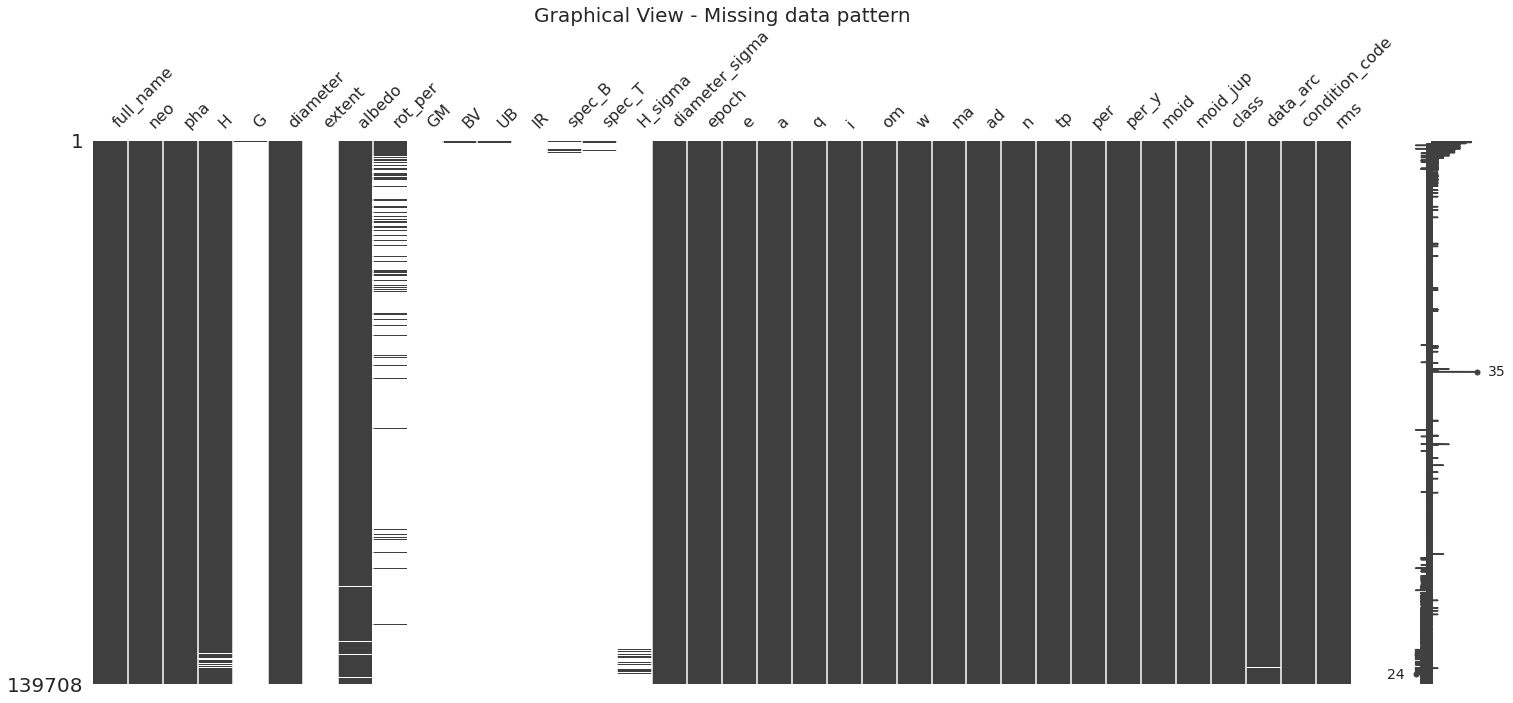

In [ ]:
msno.matrix(data)
plt.title("Graphical View - Missing data pattern", size=20)
plt.plot()

Observation:
- variables IR, GM, extent, G, UB, spec_T, BV, spec_B, H_sigma, rot_per are severely affected
- from the pattern graphical view, we also observe clearly the minorly affected variables -albedo, H, data_arc
- we don't observe any particular pattern except for the spectral features(UB, BV, IR, spec_T, spect_B) and feature GM, G almost fully missing


### 2. Statistical Analysis

In [ ]:
# creating a table to view missing value statistics
missing_data_percent = pd.DataFrame({'missing_count':data.isnull().sum(), '%_missing': round(data.isnull().sum()/data.shape[0] *100, 4)}).sort_values(by='%_missing', ascending=False)
missing_data_percent

missing_count  %_missing
IR                     139707    99.9993
GM                     139693    99.9893
extent                 139689    99.9864
G                      139589    99.9148
UB                     138742    99.3086
spec_T                 138742    99.3086
BV                     138701    99.2792
spec_B                 138294    98.9879
H_sigma                137077    98.1168
rot_per                120444    86.2112
albedo                   1139     0.8153
H                        1114     0.7974
diameter_sigma            125     0.0895
data_arc                   25     0.0179
tp                          0     0.0000
moid                        0     0.0000
per                         0     0.0000
per_y                       0     0.0000
full_name                   0     0.0000
moid_jup                    0     0.0000
class                       0     0.0000
ad                          0     0.0000
condition_code              0     0.0000
n                           0     0.0000
e                           0     0.0000
ma                          0     0.0000
w                           0     0.0000
om                          0     0.0000
i                           0     0.0000
q                           0     0.0000
a                           0     0.0000
neo                         0     0.0000
epoch                       0     0.0000
diameter                    0     0.0000
pha                         0     0.0000
rms                         0     0.0000

### Observation and Insights:
- **Missing data severity:**
  - 10 features -IR, GM, extent, G, UB, spec_T, BV, spec_B, H_sigma, rot_per severely affected (9 of these have >90% data missing)
  - 4 features albedo, H, diameter_sigma, data_arc minorly affected
- carefully observing we notice, most of the data missing are for 'Physical parameters of Asteroid'
- for 'orbital elements' features - data well populated
- for membership features (pha, neo, orbit class) - data well populated


### Decisions:
 - drop features with >80% data missing - it doesn't make any sense statistically and intuitively to impute it with mean or median of availble scarce data
 - **TO-DO at Data Preprocessing Step**: *Missing value Imputation for features 'albedo', 'H', 'data-arc', 'diameter-sigma': explore domain-specific information and data statistics to come up with startegies missing value imputation of remaining features*

### Actions: drop features with data missing >80%

In [ ]:
## Dropping features where the missing percent >80%
missing_data_percent[missing_data_percent['%_missing'] > 80]

missing_count  %_missing
IR              139707    99.9993
GM              139693    99.9893
extent          139689    99.9864
G               139589    99.9148
UB              138742    99.3086
spec_T          138742    99.3086
BV              138701    99.2792
spec_B          138294    98.9879
H_sigma         137077    98.1168
rot_per         120444    86.2112

In [ ]:
data.drop(['IR', 'GM', 'extent', 'G', 'UB', 'spec_T', 'BV', 'spec_B', 'H_sigma', 'rot_per'], axis=1, inplace=True)

In [ ]:
dataset_shape()

At this stage the DataFrame 'data' looks like this
+--------+--------+
| # rows | # cols |
+--------+--------+
| 139708 |   26   |
+--------+--------+


## Domain specific feature analysis

In [ ]:
data.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma',
       'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
       'per_y', 'moid', 'moid_jup', 'class', 'data_arc', 'condition_code',
       'rms'],
      dtype='object')

### Target Variable - 'Diameter'

- Diameter of the asteroid is approximate (note that many asteroids are not perfectly spherical, so this is an average diameter). Diameter is measured in kilometers (km). The majority of asteroid diameters are derived from their absolute magnitude 'H'.

### Orbital elements: Study & Observations

  - main elements include: 
    - a: semi-major axis - Half the length of the major axis of the orbit of the asteroid.
    - e: eccentricity - Basically the shape of the ellipse, where values close to zero are more elongated while values closer to one are more circular.
    - i: inclination - The tilt of the orbit from the reference plane. In this case, the reference plane was the ecliptic plane where the orbits of the planets are located.
    - om: (Node) longitude of the ascending node -  The angle the orbit is rotated from the reference plane's vernal point, basically describes where the asteroid “ascends” out from the reference plane.
    - ω: argument of periapsis/perhilion - The orientation of the ellipse, or the angle the orbit is rotated with respect to itself.
    - ma: The product of an orbiting body’s mean motion and time past perihelion passage.
    - q: perhilion distance - object's closest distance to the Sun (au)
    - ad: aphelion distance - object's farthest distance from the Sun (au)


  - miscellaneous features: 
      - epoch: orbit Epoch indicates the time at which the satellite's position, orbit orientation and orbit shape were last known
      - tp: time of perihelion passage - The time at which an object is at perihelion (its closest distance to the sun). The date and time at which an object orbiting the Sun is at its closest to the Sun. 
      - data_arc: number of days spanned by the data-arc
      - condition_code - orbit uncertainity estimate, ranges between 0-9, 0 is good, 9 is highlyuncertain
      - moid: Earth moid- minimum orbit intersection distance(au)
      - moid_jup: minimum distance from the orbit of Jupiter-barycenter (au)
      - rms: total normalized root mean square residual of orbit fit. Finding the orbit solution that best fits a set of observations by minimizing the root mean square of the residuals of the fit.
      - per: period in days - The time it takes an orbiting body to make one complete revolution around the Sun.
      - per_y: perod in years - represent period in years. **Since, this is redundant to 'per', we can drop this feature**


### Decisions: 
- drop 'per_y' feature
- *Not sure if we should ignore these date-time based features like epoch and time of perihelion passage. Since both features have no missing values, decide to keep these and explore it while modelling(with neural network)*

### Physical parameters: Study & Observations
we had a good number of physical paremeters in the initial dataset, most of these we had to drop due to insufficient data availability
  - H: An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.
  - albedo: Albedo is ratio of the light received by a body to the light reflected by that body. Albedo values range from 0 (pitch black) to 1 (perfect reflector)
  - diameter_sigma: it is the estimated 1-sigma uncertainty in diameter measurement.


### Decisions: 
- drop 'diameter_sigma' feature. 
Nevertheless, note this we can use this feature to compare with our model predicted interval(if we can come up with such intervals)

### Group/membership based features: Study & Observations
  - pha: Potentially hazardous asteroids, categories Y, N
  - neo: Near Earth objects, categories Y and N
  - class: orbit classes, categories:
      - TNO: TransNeptunian Object
      - CEN: Centaur, Objects with orbits between Jupiter and Neptune
      - MCA: Mars-crossing Asteroid
      - AMO: Amor- Near-Earth asteroid orbits
      - IMB; Inner Main-belt Asteroid
      - APO: Apollo- Near-Earth asteroid orbits
      - ATE: Aten- Near-Earth asteroid orbits
      - TJN: Jupiter Trojan
      - AST: Asteroid orbit not matching any defined orbit class.
      - MBA: Main-belt Asteroid
      - OMB: Outer Main-belt Asteroid
      - IEO (Interior Earth Object) - An asteroid orbit contained entirely within the orbit of the Earth. the asteroid data for this class seems to be missing here

### Decisions
These features are of relevance to study of asteroid impact to Earth. And we know diameter size We keep these feature in order to study its relationship with the target variable 'diameter' 

### Actions: drop feature per_y and diameter_sigma

In [ ]:
# dropping features 'tp', 'per_y', 'diameter_sigma' as reasoned above
data.drop(['per_y', 'diameter_sigma'], axis=1, inplace=True)

In [ ]:
# defined function to print dataset status
dataset_shape()

At this stage the DataFrame 'data' looks like this
+--------+--------+
| # rows | # cols |
+--------+--------+
| 139708 |   24   |
+--------+--------+


## Pandas Profiling

In [ ]:
!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 4.6 MB/s 
     |████████████████████████████████| 102 kB 5.2 MB/s 
     |████████████████████████████████| 690 kB 36.9 MB/s 
     |████████████████████████████████| 4.7 MB 43.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 48.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=7e2ccd79833255a159dd5d6c979617b1d8d4e74d2570586073f6f401e90f4e31
  Stored in directory: /tmp/pip-ephem-wheel-cache-v04ckr3g/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3ce15993db2890693e0282435ad076928e8c54e61ac53ae1d02e1e8dec30a2db
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project_asteroid/asteroids_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,7,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
master_profile = ProfileReport(df, title="Asteroid Data Profiling Report")
master_profile.to_file("asteroid_master_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.columns

Index(['full_name', 'name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T',
       'H_sigma', 'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class',
       'data_arc', 'condition_code', 'rms'],
      dtype='object')

In [ ]:
df.drop(['IR', 'GM', 'extent', 'G', 'UB', 'spec_T', 'BV', 'spec_B', 'H_sigma', 'rot_per', 'name', 'per_y', 'diameter_sigma'], axis=1, inplace=True)

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Asteroid Data Profiling Report")
profile.to_file("asteroid_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate study - 

Our focus here is to understand:
- How is the target variable distributed? 
- How are the Independent Variables distributed?

In [ ]:
data = df[['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo',
       'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
     'moid', 'moid_jup', 'class', 'data_arc', 'condition_code',
       'rms']]

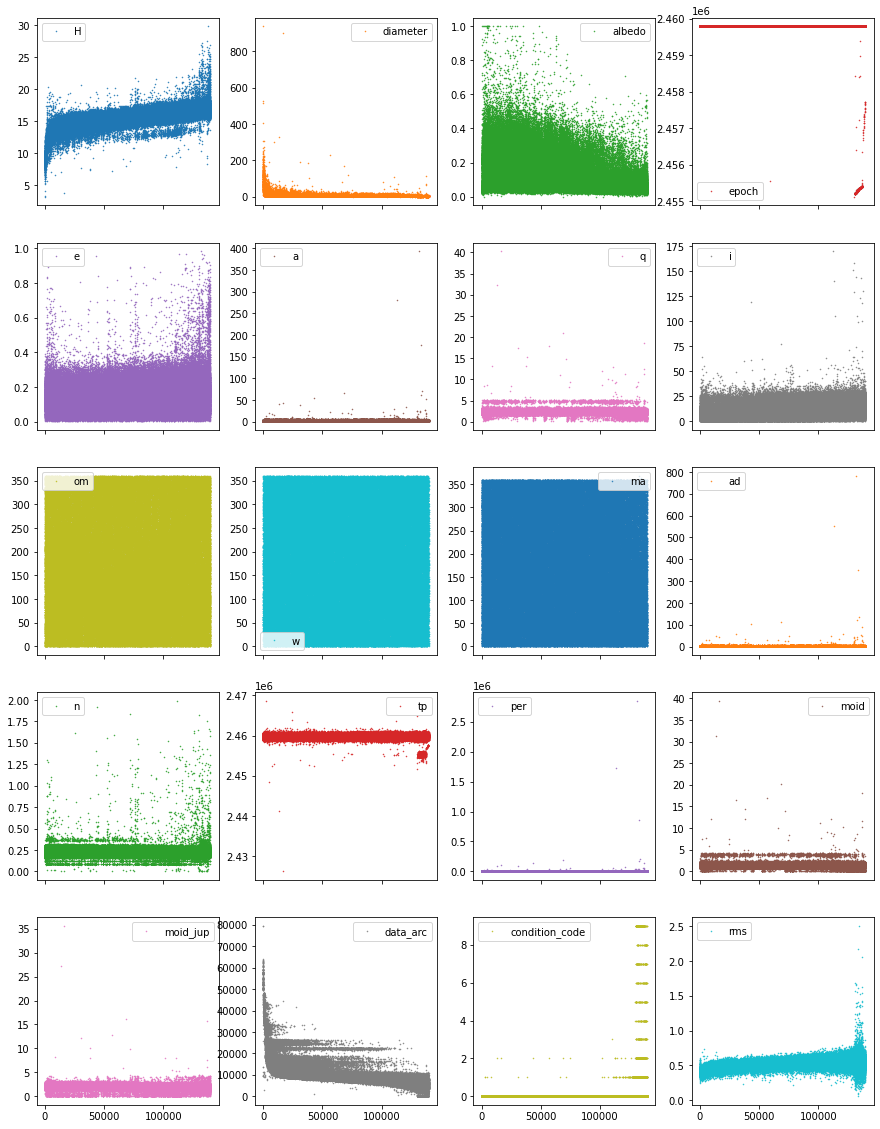

In [ ]:
# plotting the data overview for every features
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 20), markersize=1)
plt.show()

In [ ]:
#defining a function to compute quantile stats

def quantile_stats(series):
    """ function to compute quantile statistics for series 
    return: list of two list, first list with statistic name, and second list the value for the statistic parameter"""
    min_value = series.min()
    quantile_25 = series.quantile(0.25)
    quantile_50 = series.quantile(0.50)
    quantile_75 = series.quantile(0.75)
    max_value= series.max()
    range = round(max_value - min_value,3)
    IQR = round(scipy.stats.iqr(series, axis=0 , rng=(25, 75), interpolation='lower'),3)

    return [['min_value', 'quantile_25', 'quantile_50', 'quantile_75', 'max_value', 'range', 'IQR'], [min_value, quantile_25, quantile_50, quantile_75, max_value, range, IQR]]
    

In [ ]:
#defining a function to compute descriptive  stats

def descriptive_stats(series):
    """ function to compute descriptive statistics for series 
    return: list of two list, first list with statistic name, and second list the value for the statistic parameter"""
    mean_value = round(np.mean(series),3)
    median_value = np.median(series)
    mod = scipy.stats.mstats.mode(series, axis=0)
    mode_value= mod[0]
    mode_count = mod[1]
    std_dev = round(np.std(series),3)
    variance = round(np.var(series, axis=0),3)
    kurtosis = round(scipy.stats.kurtosis(series, axis=0, fisher=True),3)
    skewness = round(scipy.stats.skew(series, axis=0),3)

    return [['mean', 'median', 'mode', 'std_dev', 'variance', 'kurtosis', 'skewness'], [mean_value, median_value, mode_value, std_dev, variance, kurtosis, skewness]]

# defining a function to create a table display the quantile and descriptive stats
def print_stats_table(series):
    """ creating statistics table """
    df1 = pd.DataFrame({'Quantile Stats':quantile_stats(data.diameter)[0], 'Values':quantile_stats(data.diameter)[1]})
    df2 = pd.DataFrame({'Descriptive Stats':descriptive_stats(data.diameter)[0], 'Values':descriptive_stats(data.diameter)[1]})
    return pd.concat([df1, df2], axis=1)

### Distribution plot - diameter

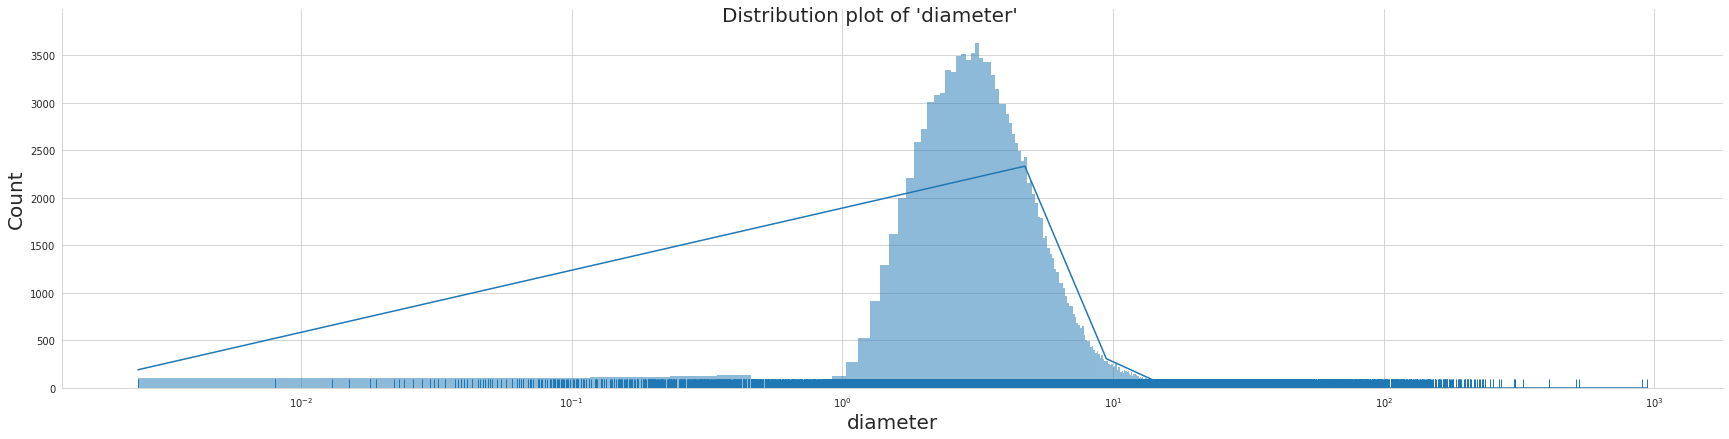

In [ ]:
## plotting diameter distribution plot

sns.set_style("whitegrid")
g = sns.displot(data=data, x='diameter', kde=True, rug=True, height=6, aspect=4)
g.set(xscale='log')
g.set_xlabels(fontsize=20)
g.set_ylabels(fontsize=20)
g.fig.suptitle("Distribution plot of 'diameter'", fontsize=20)
plt.show()

Observation:
-  target variable 'diameter' display a skewed distribution, majority of the values are concentrated between 0 and 10
- skewness - positively skewed with a long tail in the positive direction 
- kurtosis - In Fisher’s definiton, the kurtosis of the normal distribution is zero. Here we see that diameter distribution is far from normal
- target value 'diameter' is imbalanced 


### BOX Plot - Diameter

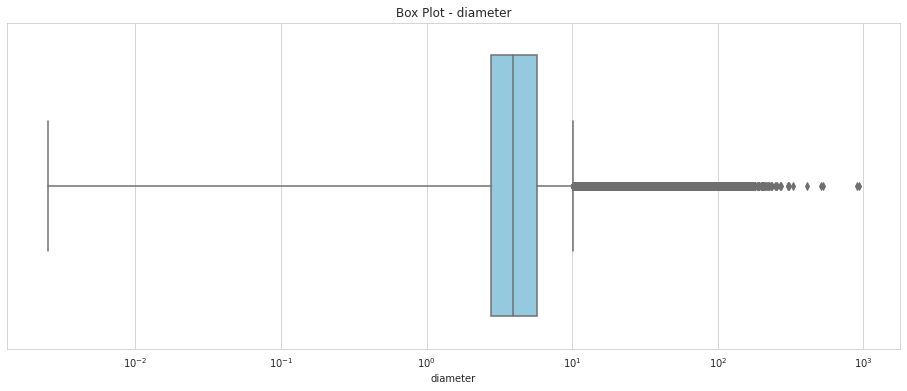

In [ ]:
##plotting box plot

fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x="diameter", data=data, color='skyblue')
ax.set(xscale='log')
plt.title('Box Plot - diameter')
plt.show()

Observation:
- 75% of data lies below 10 km
- outliers - many, and in our case these are to be considered as these are actual events. We would have to choose a metric which won't penalize these

### Looking at 'diameter' variable statistics

In [ ]:
print_stats_table(data.diameter)

Quantile Stats    Values Descriptive Stats    Values
0      min_value    0.0025              mean     5.457
1    quantile_25    2.7620            median     3.948
2    quantile_50    3.9480              mode   [2.842]
3    quantile_75    5.7300           std_dev     9.305
4      max_value  939.4000          variance    86.592
5          range  939.3970          kurtosis  1659.988
6            IQR    2.9680          skewness    25.971

Observation:
- quantile_75 is 5.73 which means that 75% of data is >= 5.73, while max_value is 939.4
- skewness - positively skewed (25.971 as skewness)
- kurtosis - In Fisher’s definiton, the kurtosis of the normal distribution is zero. Here we see that diamter distribution is far from normal

### CDF - diameter

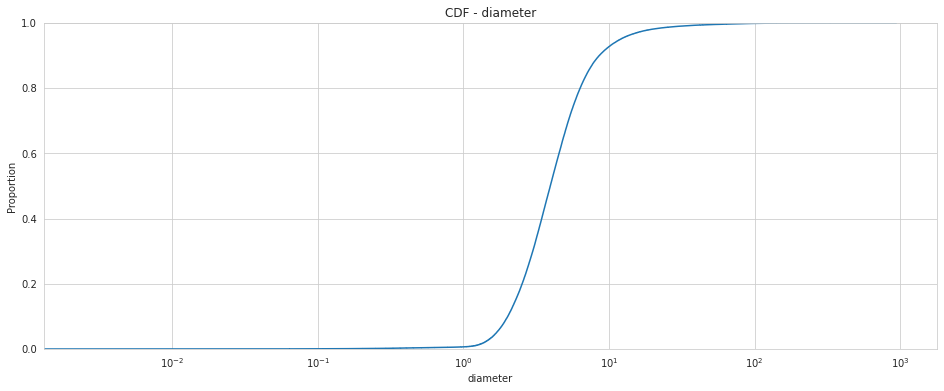

In [ ]:
## plotting CDF
fig, ax = plt.subplots(figsize=(16,6))
sns.ecdfplot(x="diameter", data=data)
ax.set(xscale='log')
plt.title('CDF - diameter')
plt.show()

Observations:
- 80% of the sample diameter is approx <=6.
- 99% of the sample diameter is approx <=33.

## Binning - diameter 
This is to explore the target variable and its correlaton with the independent variables.


## Binning the target 'diameter based on size

Creating a **new variable 'size_class'** - 

- s1: 0 - 1 km
- s2: 1 - 10 km
- s3: 10 - 100 km
- s4: >100 km



In [ ]:
def size_bin(x):
    if x<=1:
        sizebin='s1'
    elif x>1 and x<=10:
        sizebin='s2'
    elif x>10 and x<=100:
        sizebin='s3'
    elif x>100:
        sizebin='s4'
    return sizebin

In [ ]:
data['size_class'] = data.diameter.apply(size_bin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


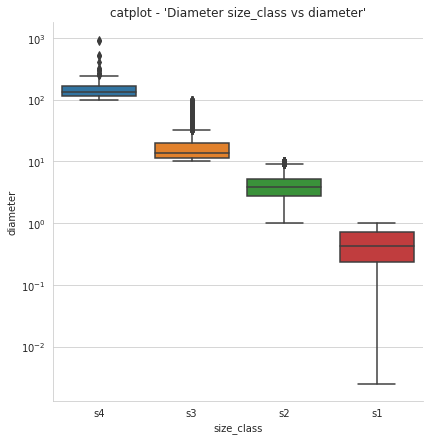

In [ ]:
sns.set_style("whitegrid")
g =sns.catplot(x="size_class", y="diameter", kind="box", data=data, height=6)
g.set(yscale='log')
plt.title("catplot - 'Diameter size_class vs diameter'")
plt.show()

In [ ]:
data.size_class.value_counts()

s2    128613
s3      9932
s1       923
s4       240
Name: size_class, dtype: int64

In [ ]:
# plotting 
data.size_class.value_counts()
plt.show()

### Using KBinsDiscretizer to bin diameter target variable

Here, i am trying unsupervised binning strategy using sklearn library KBinsDiscretizer

- we use kmeans strategy
- creating new target variable as **'size_kbins'**

On trying with 4 bins, ended up with last bin containing only 2 points, hence considering 3 cluster

```
dia_continous = data.diameter.copy()
kbin = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy='kmeans')
kbin.fit(dia_continous.values.reshape(-1,1))
dia_Kbinned = kbin.transform(dia_continous.values.reshape(-1,1))


0.0    137396
1.0      2011
2.0       299
3.0         2
Name: kbin, dtype: int64
```



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

#using binning strategy as kmeans clustering
#encode method as ordinal which would return the bin identifier encoded as an integer value.

dia_continous = data.diameter.copy()
kbin = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy='kmeans')
kbin.fit(dia_continous.values.reshape(-1,1))
dia_Kbinned = kbin.transform(dia_continous.values.reshape(-1,1))

In [ ]:
kbin.bin_edges_[0]

array([2.50000000e-03, 1.02706188e+01, 4.29132695e+01, 1.19658651e+02,
       5.44793425e+02, 9.39400000e+02])

In [ ]:
# adding kbinned size class also as a feature
data['size_kbin'] = dia_Kbinned

In [ ]:
data.size_kbin.value_counts()

0.0    130103
1.0      8690
2.0       754
3.0       159
4.0         2
Name: size_kbin, dtype: int64

Again we have got a 4.0 bin with only 2 points, so we can club class 3.0 and 4.0.

In [ ]:
# converting all bin 4.0 to 3.0
data.loc[data.size_kbin==4.0,'size_kbin'] = 3.0

In [ ]:
#after clubbing bin 3.0 and 4.0
data.size_kbin.value_counts()

0.0    130103
1.0      8690
2.0       754
3.0       161
Name: size_kbin, dtype: int64

#### lets compare the two binned diamtere variables - 'size_class' and 'size_kbin'

In [ ]:
d_corr = pd.DataFrame({'kbin': data.size_kbin.values, 'size_class': data.size_class.values})

Using contigency table and chi2 test to find correlation between these two variables

In [ ]:
#contingency table
table_contingency = pd.crosstab(columns=d_corr.size_class, index=d_corr.kbin)
table_contingency

size_class   s1      s2    s3   s4
kbin                              
0.0         923  128613   567    0
1.0           0       0  8690    0
2.0           0       0   675   79
3.0           0       0     0  161

### Checking correlation between size_class and size_kbins using Hypothesis test, test statistic chi2 and 

- NULL Hypothesis: No corrlation between kbin and size_class
- ALTERNATE Hypothesis: There is correlation between the two variables

In [ ]:
from scipy.stats import chi2_contingency

def chi_cramer(table):
      """ function computes chi2 score and Cramer's V score given the contingency table"""
      # compute chi2
      chi2, p, degree, expected = chi2_contingency([table.iloc[i].values for i in range(len(table))])
      print(f"chi2: {chi2}")
      print(f"p-value: {p}")
      print(f"degree of freedom: {degree}")

      #computing Cramer's V 
      N= np.sum([table.iloc[i].values for i in range(len(table))])
      score = np.sqrt(chi2/(N * min(table.shape[1]-1, table.shape[0]-1)))
      print(f"Cramer's V is: {score}")
      

In [ ]:
chi_cramer(table_contingency)

chi2: 228702.4746505285
p-value: 0.0
degree of freedom: 9
Cramer's V is: 0.7386933116610181


Observations:
- high chi2 values depicting high correlation
- p-value 0 state we can reject NULL Hypothesis 
- Cramers v score depicts very strong correlation (>0.6 is considered to strong in general)

### Going forward we would study the relation of the independent variables with 
  - actual target 'diameter' as well as
  - the binned diameter feature - 'size_class' and 'size_kbins'

## Univariate Analysis - Distribution of Independent features

##### Numerical features

[]

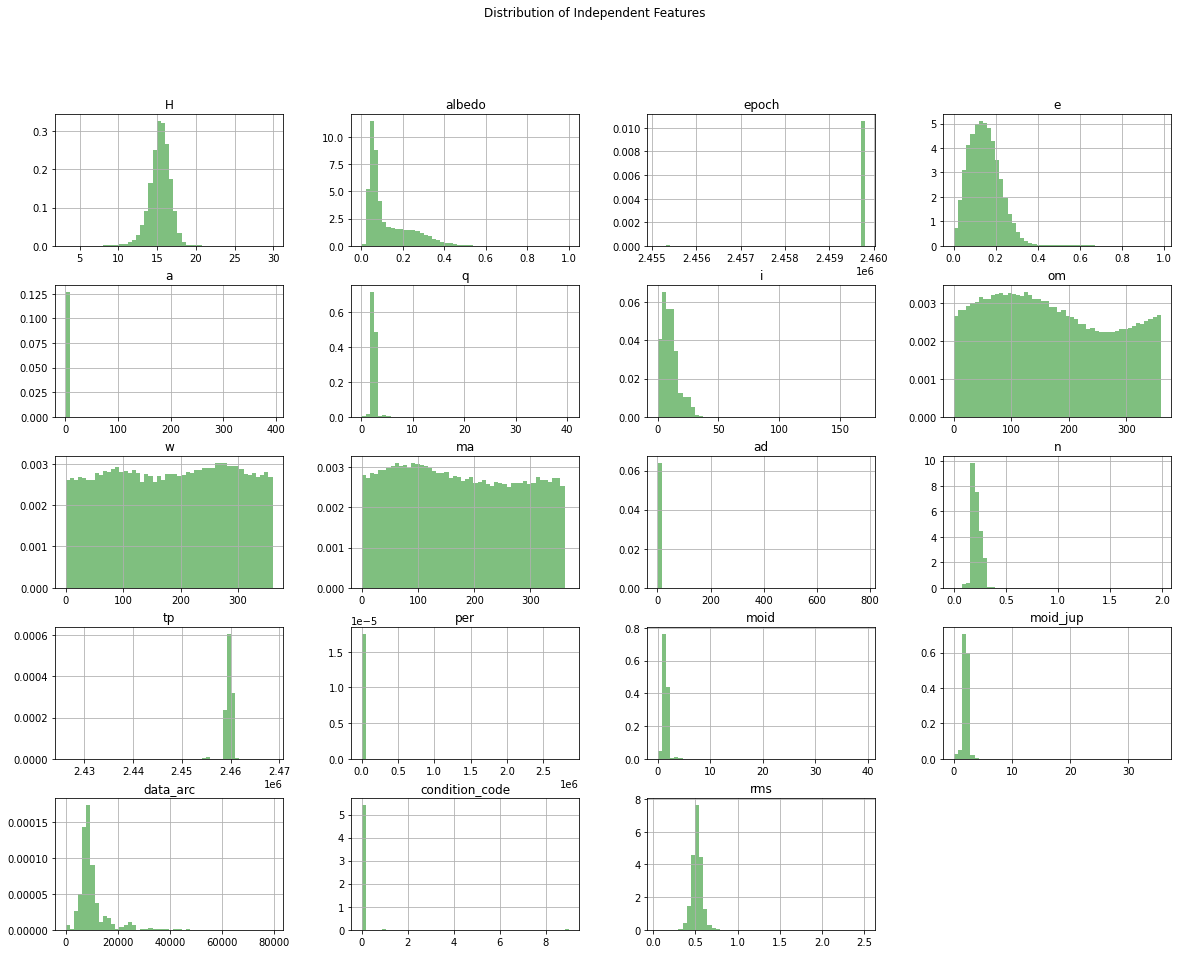

In [ ]:
data.drop('diameter', axis=1).hist(bins=50, figsize=(20, 15), color='g', alpha=0.5, density=True)
plt.suptitle("Distribution of Independent Features")
plt.plot()

Observations:
- Independent features diaplay different distributions
  - some of the feature display skewed distribution
  - om, w, ma distribution seems closeto Uniform type
- if we observe the x axis, we could get an idea about the range of values each feature cover. These also vary a lot 

##### Categorical features

In [ ]:
# plotting pie chart for 'pha'
value= data.pha.value_counts().values
names = ['Not Hazardous', 'Hazardous']
fig = px.pie(data, values=value, names=names, title='Potentially Hazardous Asteroids - Distribution')
fig.show()

Observations:
- approx. 99% of asteroid are labeled and considered as not hazardous
- very small percent is considered as potentially hazardous

In [ ]:
# plotting pie chart for 'neo'class

import plotly.express as px
value= data.neo.value_counts().values
names = ['Not a NEO', 'NEO']
fig = px.pie(data, values=value, names=names, title='Near Earth Objects - Distribution')
fig.show()

Observations:
- more than 99 percent of asteroid are not near Earth objects
- only fewer percent of asteroids are near Earth

In [ ]:
# plotting pie chart for 'orbit class'

import plotly.express as px
value= data['class'].value_counts().values
names =  ['MBA', 'OMB', 'TJN', 'APO', 'MCA', 'IMB', 'AMO', 'ATE', 'CEN', 'TNO', 'AST']
fig = px.pie(data, values=value, names=names, title=' Asteroid Orbit Class - Distribution')
fig.show()

Observations:
- more than 90% of asteroid belong to main-asteroid belt
- rest of the asteroid belong to other 10 classes
- Near Earth asteroid classes - AMOR, APO, ATE constitute very small percentage of total asteroids

## Bivariate Analysis


### Continuous Independent Variable vs target variable 'diameter'


#### 1. How are the independent variable related to  the target 'diameter'?
- Is there any kind of association?
- How important the independent variable could be for modelling 'diameter' prediction?

a. albedo vs target-diameter

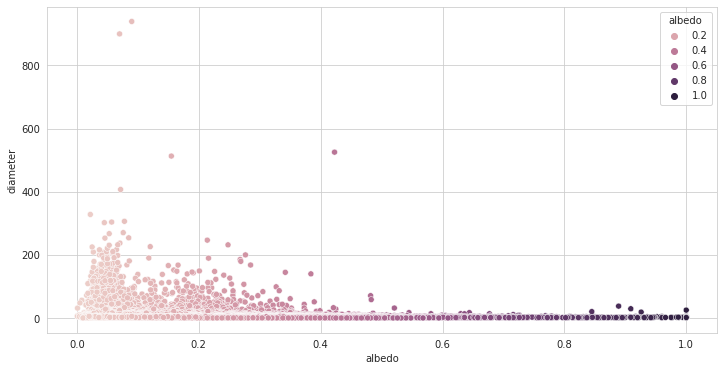

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.albedo, y=data.diameter, hue=data.albedo, color='crimson')
plt.show()

Observation

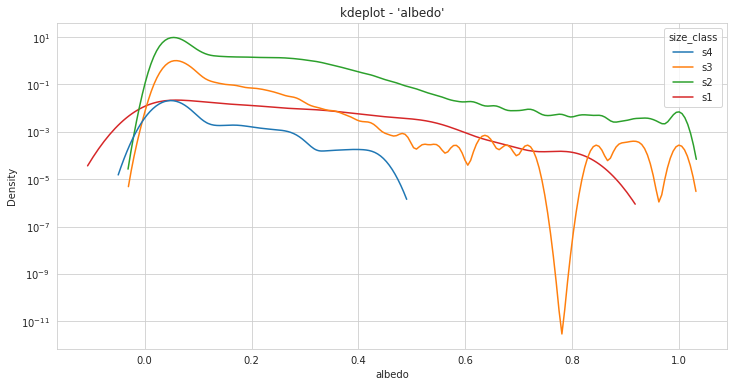

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=data, x="albedo", hue="size_class", ax=ax)
ax.set(yscale='log')
ax.set_title("kdeplot - 'albedo'")
plt.show()

Observations:
- s2, s3 are totally overlapping, with albedo as a feature, we are not able distinguish between these size ranges, both size ranges are spanning through albedo 0 to 1
- s4 although overlaps with other size ranges but we can make out that albedo for s4 is always approx <=0.5
- we can make out distinct coorelation between s1 and albedo only at very low albedo value. This info not very useful as s1 spans to 0.9 albedo value

Insights:
- 'albedo' feature give little intuition for diameters 

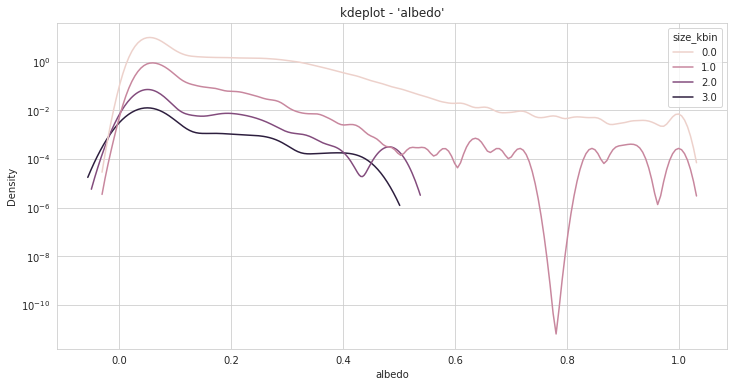

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=data, x="albedo", hue="size_kbin", ax=ax)
ax.set(yscale='log')
ax.set_title("kdeplot - 'albedo'")
plt.show()

Observation:
- class 0 and 1 are overlapping
- class 2 and 3 are mostly overlapping
- observation are close to using hue as size_class binned target diameter

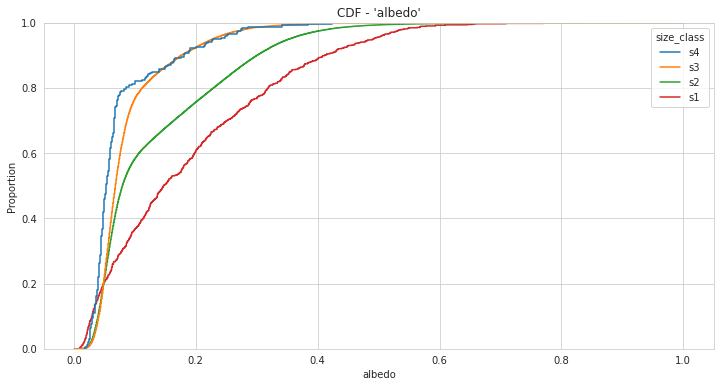

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.ecdfplot(data=data, x="albedo", hue="size_class", ax=ax)
ax.set_title("CDF - 'albedo'")
plt.show()

Observations:
- 80% of s1 is less than equal to approx. 0.3 albedo
- 80% of s2 is less than equal to approx. 0.25 albedo
- 80% of s3 is less than equal to approx. 0.1 albedo
- 80% of s4 is less than equal to approx. 0.05 albedo


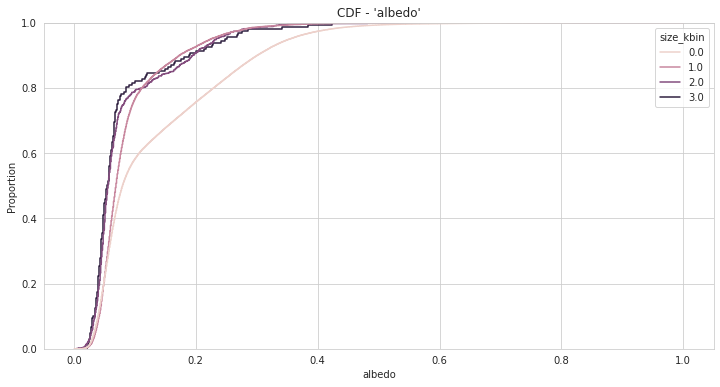

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.ecdfplot(data=data, x="albedo", hue="size_kbin", ax=ax)
ax.set_title("CDF - 'albedo'")
plt.show()

Observations:
- 80% of class 0-3 are approximately have <=0.1 albedo
- 80% of class 4 is <=0.22 albedo


**albedo as a feature does give some intuition of diameter, and could be helpful**


b. absolute magnitude H vs target-diameter

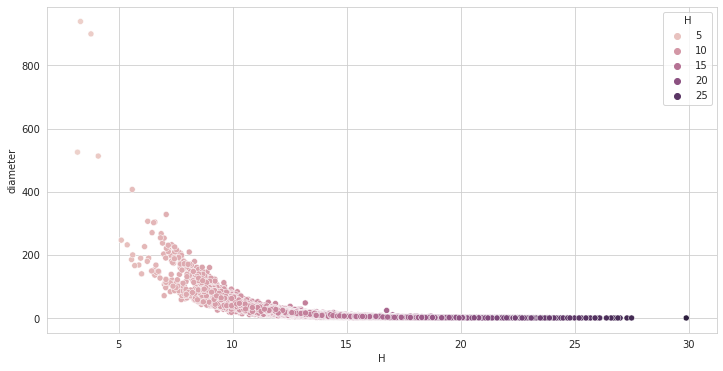

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data.H, y=data.diameter, hue=data.H, color='crimson')
plt.show()

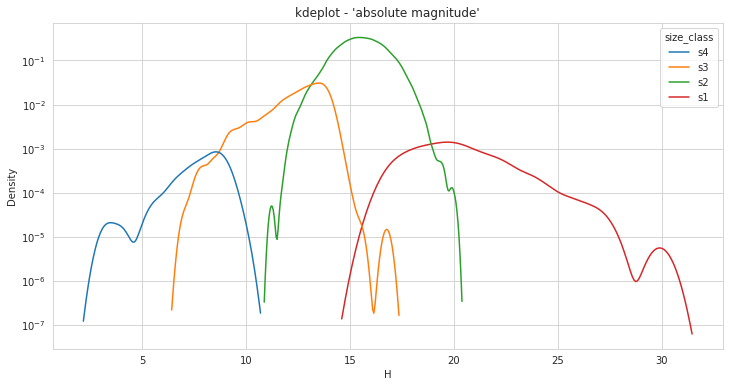

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=data, x="H", hue="size_class", ax=ax)
ax.set(yscale='log')
ax.set_title("kdeplot - 'absolute magnitude'")
plt.show()

Observations:
- s1, s2, s3, s4 overlaps but we also view distinct regions which are non-overlapping
- s1 spans distinct region between 20+ to 32
- s4 spans distinctly from approx. 2 to 6

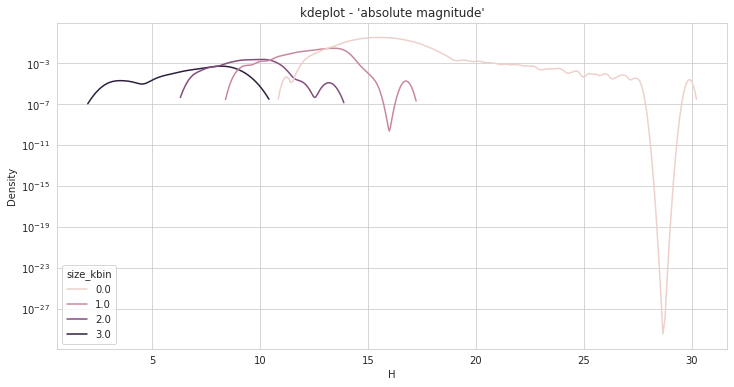

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data=data, x="H", hue="size_kbin", ax=ax)
ax.set(yscale='log')
ax.set_title("kdeplot - 'absolute magnitude'")
plt.show()

Observations:


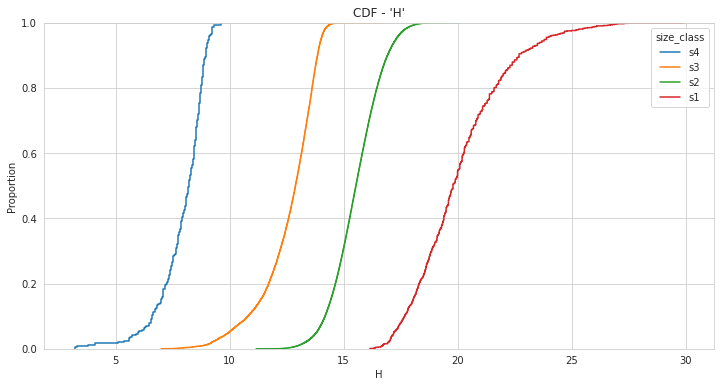

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.ecdfplot(data=data, x="H", hue="size_class", ax=ax)
ax.set_title("CDF - 'H'")
plt.show()

Observations:
- 80% of s1 is approx. <=22 absolute magnitude
- 80% of s2 is approx. <=17 absolute magnitude
- 80% of s3 is approx. <=14  absolute magnitude
- 80% of s4 is approx. <=8 absolute magnitude

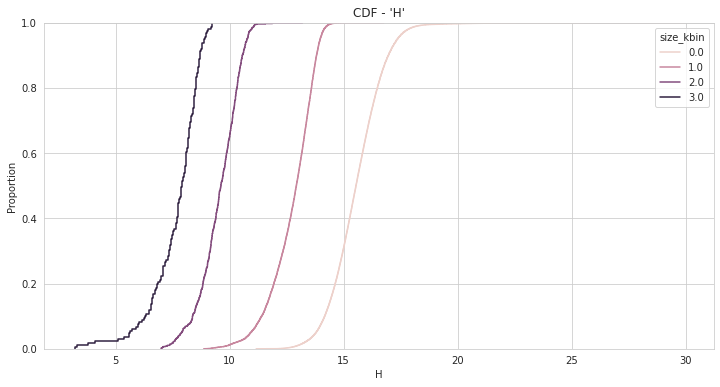

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.ecdfplot(data=data, x="H", hue="size_kbin", ax=ax)
ax.set_title("CDF - 'H'")
plt.show()

Observations:
- 80% of class0 is approx. <=17 absolute magnitude
- 80% of class1 is approx. <=13 absolute magnitude
- 80% of class2 is approx. <=11  absolute magnitude
- 80% of class3 is approx. <=7 absolute magnitude

Insights:
**absolute magnitude gives clear direction to distinguish asteroid sizes, this is very useful feature**
- we can use this observation and insight to featurize 'absolute magnitude'

c. Orbital Elements vs diameter

[]

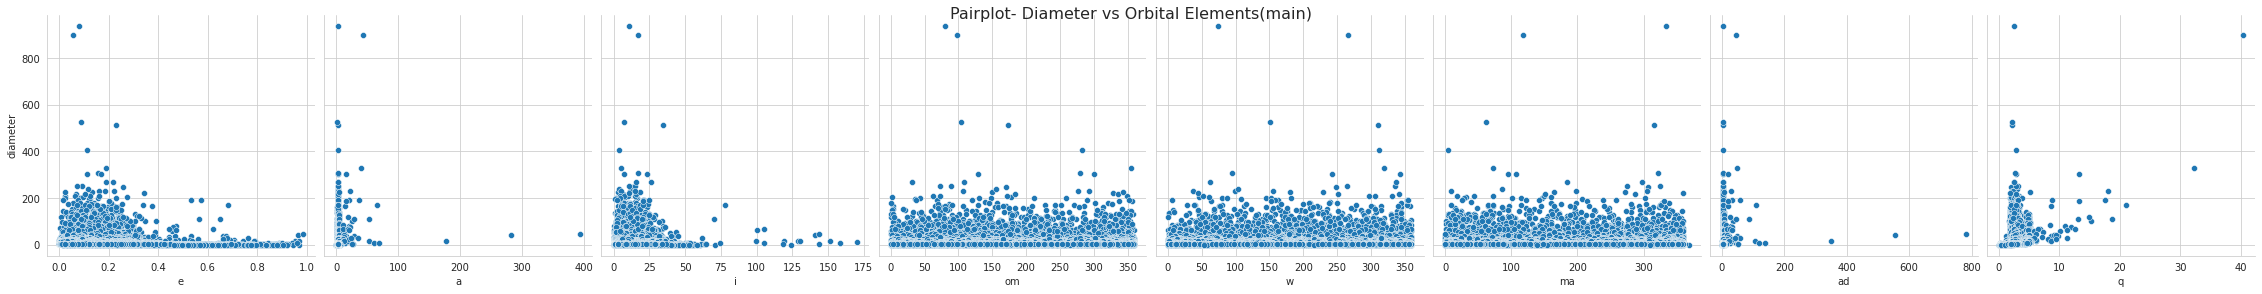

In [ ]:
### plotting pair plot for Main orbital elemenst and diameter

orbital_main=['e', 'a', 'i', 'om', 'w', 'ma', 'ad', 'q']
sns.pairplot(
    data,
    x_vars = orbital_main,
    y_vars = ['diameter'],
    height=4,
)
plt.suptitle("Pairplot- Diameter vs Orbital Elements(main)", size=16, y=1)
plt.plot()


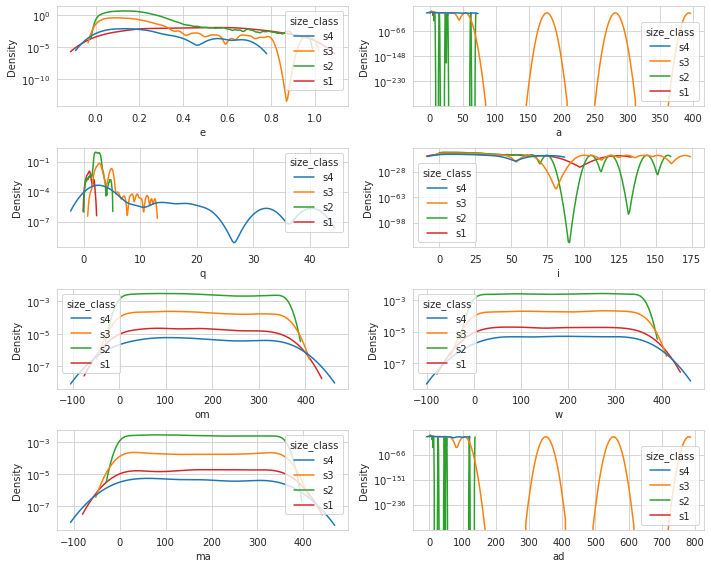

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,8))
# axes.suptitle("Orbital Main Elements vs Diameter size class")
columns = ['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad']
for col, ax in zip(columns, axes.ravel()):
    sns.kdeplot(data=data, x=data[col], hue="size_class", ax=ax)
    ax.set(yscale='log')
plt.tight_layout()

Observations:
- 'ad', 'a' seems to distinguish s3 clearly
- 'q' feature value >11 clearly states the size is s4 
- **feature 'om', 'w', 'ma' are not able to distinguish the differnt diameter sizes**


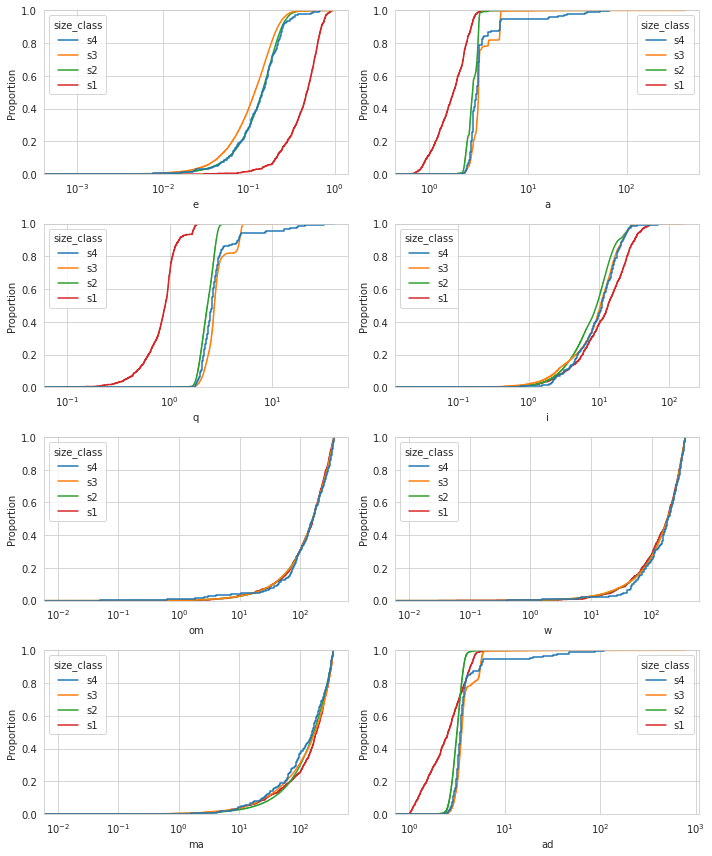

In [ ]:
# plotting CDF for Orbital Main Elements with 'diameter size class' as hue

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))
# axes.suptitle("Orbital Main Elements vs Diameter size class")
columns = ['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad']
for col, ax in zip(columns, axes.ravel()):
    sns.ecdfplot(data=data, x=data[col], hue="size_class", ax=ax)
    ax.set(xscale='log')
plt.tight_layout()

Observations:

- 'e', 'q', 'a' seems to make some distinction for certain class size


**feature 'a', 'q', 'e' seems useful for the diameter prediction**



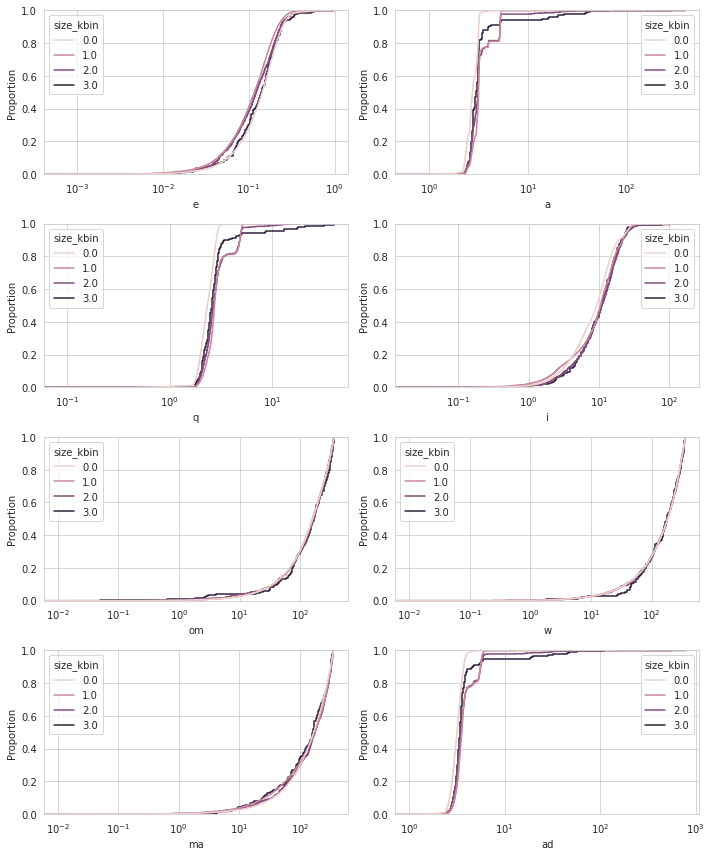

In [ ]:
# plotting CDF for Orbital Main Elements with 'diameter size kbinned' as hue

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))
# axes.suptitle("Orbital Main Elements vs Diameter size class")
columns = ['e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad']
for col, ax in zip(columns, axes.ravel()):
    sns.ecdfplot(data=data, x=data[col], hue="size_kbin", ax=ax)
    ax.set(xscale='log')
plt.tight_layout()

Other Orbital Elements vs diameter

In [ ]:
orbital_ele_misc=['epoch', 'moid', 'moid_jup', 'per', 'data_arc', 'n', 'rms', 'tp']

[]

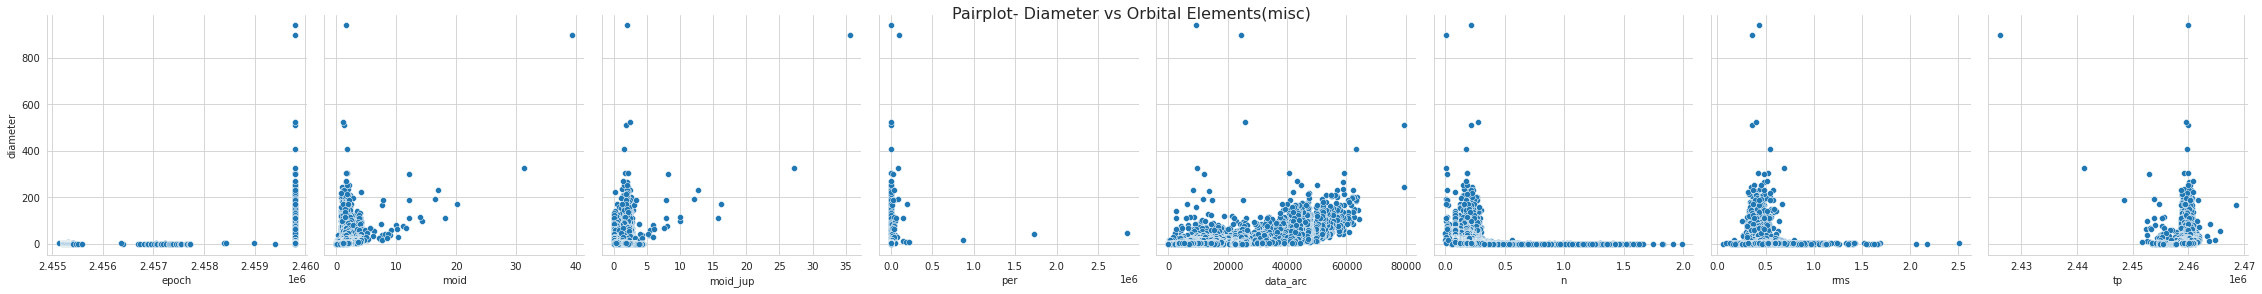

In [ ]:
### plotting pair plot for diameter vs misc orbital elements

sns.pairplot(
    data,
    x_vars = orbital_ele_misc,
    y_vars = ['diameter'],
    height=4,
)
plt.suptitle("Pairplot- Diameter vs Orbital Elements(misc)", size=16, y=1)
plt.plot()

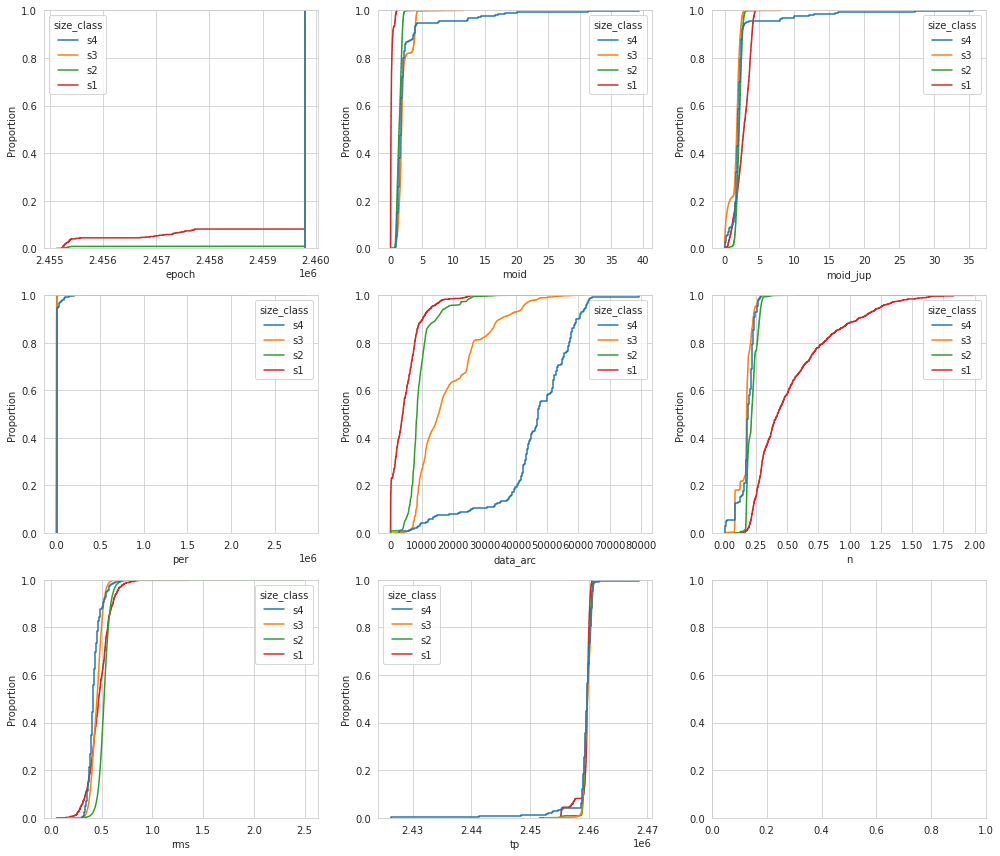

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,12))
for col, ax in zip(orbital_ele_misc, axes.ravel()):
    sns.ecdfplot(data=data, x=data[col], hue="size_class", ax=ax)
    #ax.set(yscale='log')
plt.tight_layout()

Observations:
- data_arc:
  - 80% of s4 is approx. <=5800 data_arc value
  - 80% of s3 is approx. <=2600 data_arc value
  - 80% of s2 is approx. <=1000 data_arc value
  - 80% of s1 is approx. <=800 data_arc value
-'n': s2, s3, s4 are mostly below 0.25, while for s1 99% ranges between 0.25-2.0
- feature 'tp', moid, moid_jup display dictinctly s4 class to small extent
- feature 'epoch' also display some distinction for s4


**data_arc could be very useful features**, while 'n' also seems to help with s1 class 
'rms' doesn

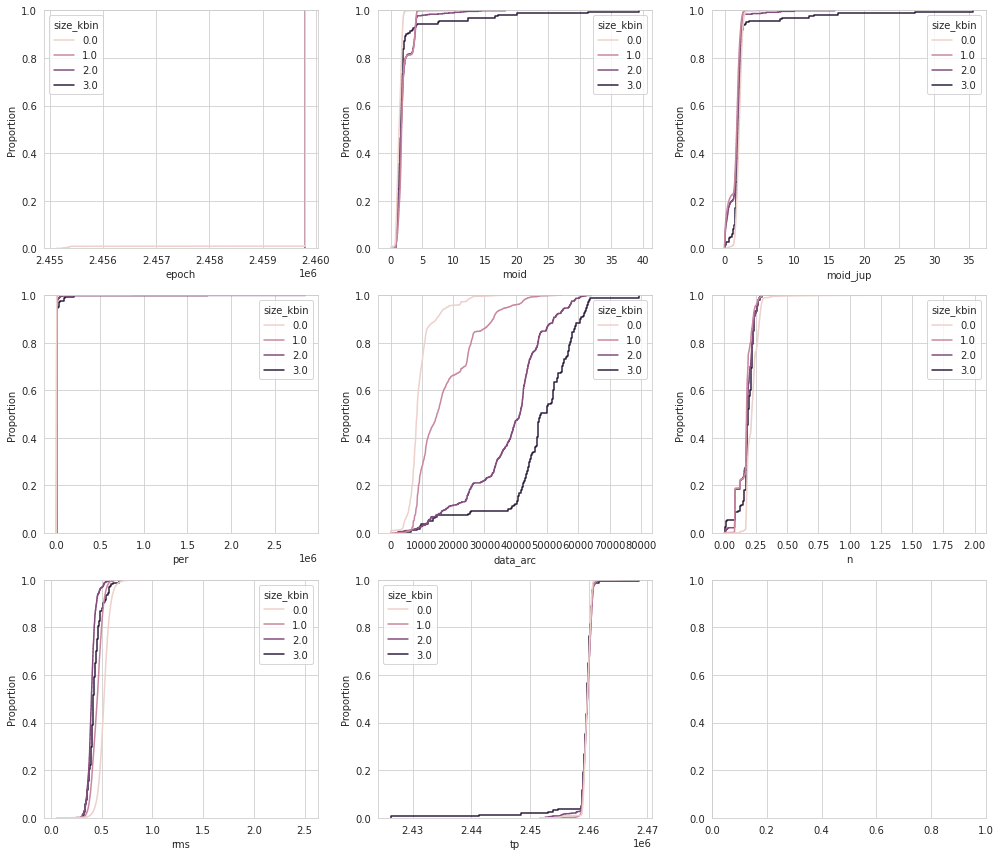

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
for col, ax in zip(orbital_ele_misc, axes.ravel()):
    sns.ecdfplot(data=data, x=data[col], hue="size_kbin", ax=ax)
    #ax.set(yscale='log')
plt.tight_layout()

Observations:
- observation very similar to that observed when hue is size_class
- data_arc is a useful feature

#### 2. Correlation Study- Continuous Independent Variables with 'Diameter'

In [ ]:
# pairwise correlation between continous variable and diameter

variables = data[['albedo', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'class', 'data_arc', 'rms']].copy()
corr_mat = variables.corrwith(data['diameter'])
corr_mat = pd.DataFrame(corr_mat, columns=['pcc']).sort_values('pcc', ascending=False)
corr_mat

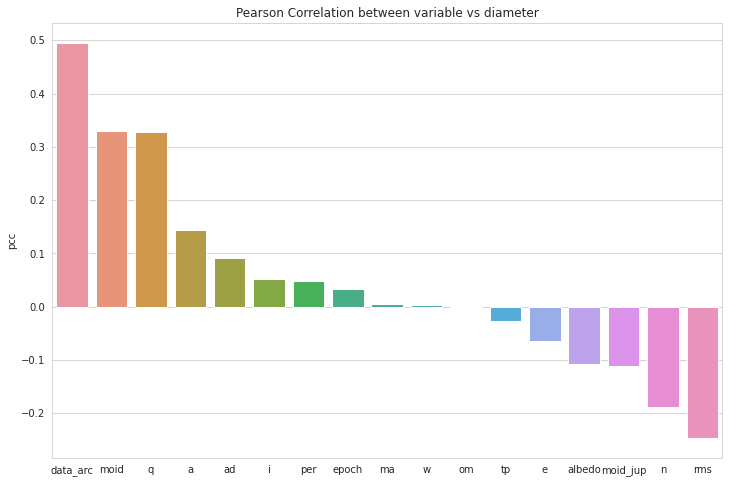

In [ ]:
## plotting the correlation 
plt.figure(figsize=(12,8))
sns.barplot(data=corr_mat, x=corr_mat.index, y='pcc')
plt.title('Pearson Correlation between variable vs diameter')
plt.show()

Observation:

- **data_arc** variable has high postive correlation with diameter
- weak negative coorelation observed with albedo, moi_jup, 'n', and rms
- '**ma', 'w', and 'om' has no or little correlation with diameter**

### Categorical Variables vs target 'diameter'


#### 1. How are the Categorical Variables related to target 'diameter'?

Categorical Variables include:
- pha
- neo
- class
- condition_code

##### 1. PHA vs diameter

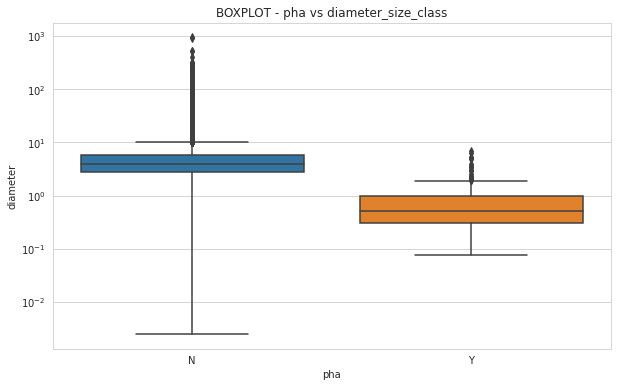

In [ ]:
# plotting box plot for pha vs diameter
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data, x="pha", y="diameter", ax=ax)
ax.set(yscale='log')
ax.set_title("BOXPLOT - pha vs diameter")
plt.show()

Observations:
- Asteroids that are labelled as potentially hazardous are mostly < 1 km in size as per the data. The reason could be that its not only the size that labels an asteroid as hazardous to Earth but also how close proximity is it from Earth and its trajectory also are soem of other factors that decide an asteroid to be hazardous or not

- For Non hazardous category also, we observe that most are within 1 km size, but there are also some very obvious bigger ones here 

Insights:
- this feature could give some direction to diameter prediction

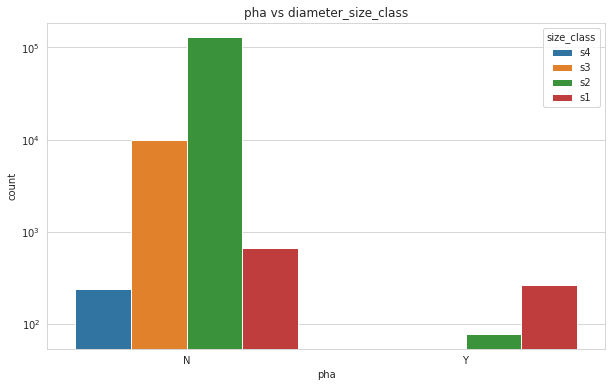

In [ ]:
# plotting a count plot pha vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='pha', hue='size_class', ax=ax)
ax.set(yscale='log')
ax.set_title("pha vs diameter_size_class")
plt.show()

Observations:

- PHAs do not include s3 and s4 sized asteroids

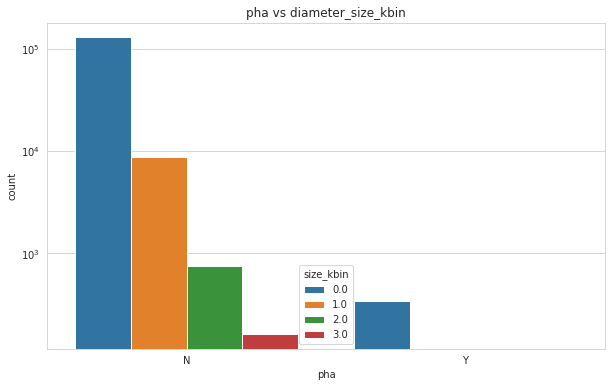

In [ ]:
# plotting a count plot pha vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='pha', hue='size_kbin', ax=ax)
ax.set(yscale='log')
ax.set_title("pha vs diameter_size_kbin")
plt.show()

Obervations:
- pha have only class 0 type asteroids

##### 2. NEO vs diameter

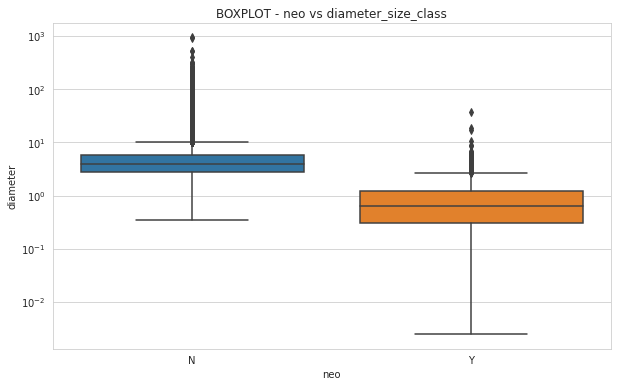

In [ ]:
# plotting box plot for neo vs diameter
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data, x="neo", y="diameter", ax=ax)
ax.set(yscale='log')
ax.set_title("BOXPLOT - neo vs diameter")
plt.show()

Observations:
- Near Earth asteroids mostly appears to be <= 1 km diameter
- Non NEO asteroids also are mostly approx. between 5-8 km diameter but the category also include bigger sized ones

Insights:
- this feature could give some direction to diameter prediction

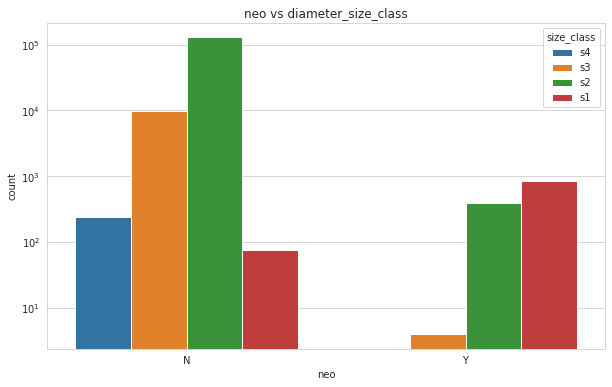

In [ ]:
# plotting a count plot neo vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='neo', hue='size_class', ax=ax)
ax.set(yscale='log')
ax.set_title("neo vs diameter_size_class")
plt.show()

Observations:

- Non-NEOs do not have s-4 sized asteroids

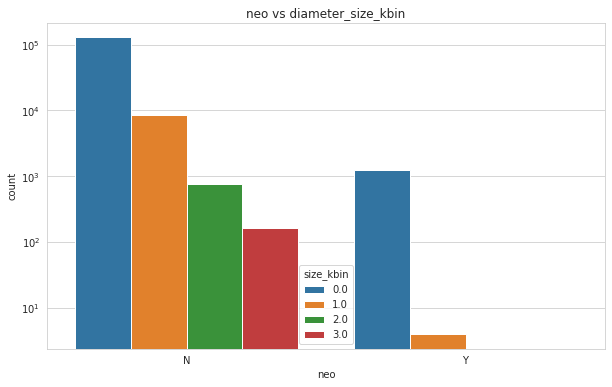

In [ ]:
# plotting a count plot neo vs diameter size_kbin
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='neo', hue='size_kbin', ax=ax)
ax.set(yscale='log')
ax.set_title("neo vs diameter_size_kbin")
plt.show()

##### 3. Orbit class vs diameter

In [ ]:
# plotting box plot for orbit class vs diameter
fig = px.box(data, x="class", y="diameter")
fig.update_yaxes(type='log')
fig.show()

Observations: 
- TNO - TransNeptunian Object are bigger asteroids, 75% of these are <=181 km diameter
- CEN - Centaur, Objects with orbits between Jupiter and Neptune are also big ones, 75% of these <= 67 km diameter size. This also got some outliers which span upto the size of 300km size
- MCA(Mars-crossing Asteroid) -  asteroid sizes within approx 40 km diameter size
- AMO(Amor, Near-Earth asteroid orbits) - asteroid sizes within approx 40 km diameter size
- IMB(Inner Main-belt Asteroid)- asteroid sizes within approx 11 km diameter size
- APO(Apollo), ATE(Aten) sizes are within approx. 8 km and 3km respectively. Both are Near-Earth asteroid orbits
- TJN - Jupiter Trojan, 75% of these are <=45 km diameter. Also observe some outlier spanning upto 225 km diameter size
- AST - Asteroid orbit not matching any defined orbit class. Asteroid in this class seem to range from 1km - 32 Km diameter size
- MBA(Main-belt Asteroid) and OMB(Outer Main-belt Asteroid)- the asetroid of these class are mostly within approx 30 km, but have outliers spanning in bigger size ranges upto 939 as max for MBA, 253 for OMB
- IEO (Interior Earth Object) - An asteroid orbit contained entirely within the orbit of the Earth. the asteroid data for this class seems to be missing here


Insights:
- orbit class does give diameter intuition

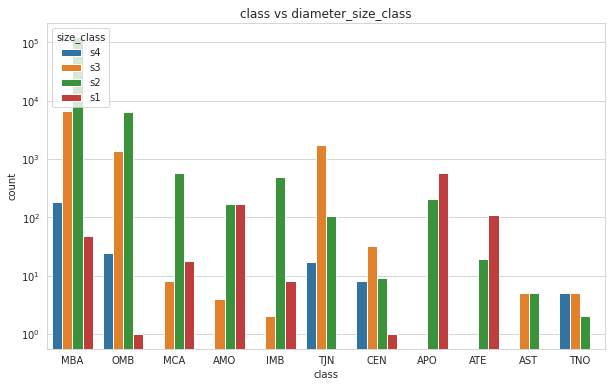

In [ ]:
# plotting a count plot class vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='class', hue='size_class', ax=ax)
ax.set(yscale='log')
ax.set_title("class vs diameter_size_class")
plt.show()

Observations:

- APO and ATE has only s1 and s2
- MCA, AMO, IMB have s1, s2, s3 sized asteroids
- AST have one s2 and s3
- MBA, OMB and CEN has all four sized asteroids - s1, s2, s3, s4
- TJN, TNO has s2, s3, s4


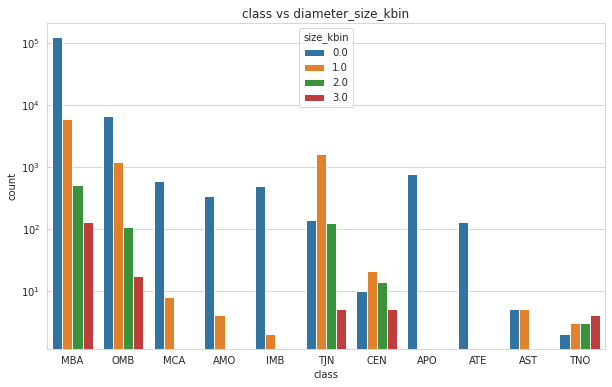

In [ ]:
# plotting a count plot class vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='class', hue='size_kbin', ax=ax)
ax.set(yscale='log')
ax.set_title("class vs diameter_size_kbin")
plt.show()

Observations:

- APO, ATE is only class 0
- MCA, AMO, IMB, AST have class 0 and class 1
- OMB, TJN, CEN, MBA and TNO span all four classes 0-3

##### 4. condition_code vs diameter

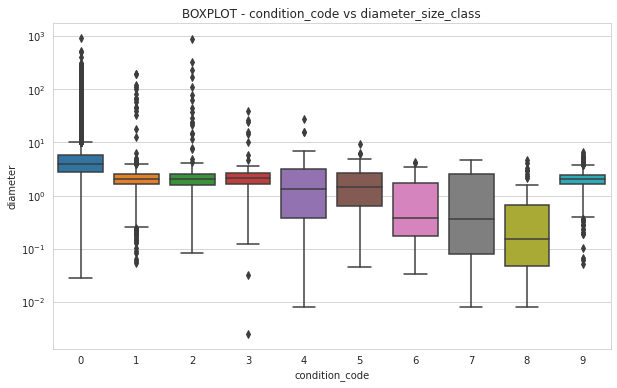

In [ ]:
# plotting box plot for orbital misc. feature condition_code vs diameter
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data, x="condition_code", y="diameter", ax=ax)
ax.set(yscale='log')
ax.set_title("BOXPLOT - condition_code vs diameter_size_class")
plt.show()

Observation:
- for asteroid with larger diameter, we observe the orbit uncertainity estimate is low and is good

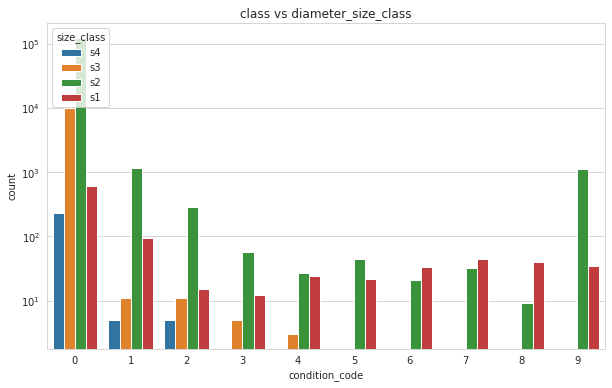

In [ ]:
# plotting a count plot condition_code vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='condition_code', hue='size_class', ax=ax)
ax.set(yscale='log')
ax.set_title("class vs diameter_size_class")
plt.show()

Observation:
- conditon_code 5-9 have s1 and s2 sized asteroids
- condition_code 3, 4 have s1, s2, s3
- condition_code 0, 1, 2 have s1, s2, s3, s4



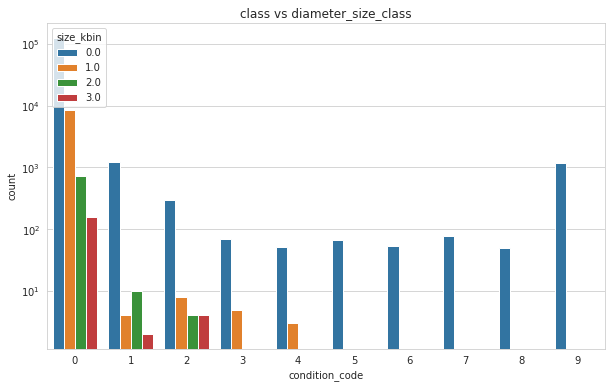

In [ ]:
# plotting a count plot condition_code vs diameter size_class
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='condition_code', hue='size_kbin', ax=ax)
ax.set(yscale='log')
ax.set_title("class vs diameter_size_class")
plt.show()

Observations:
- condition_code 5-9 display only class 0
- condition_code 3,4 display class0 and class 1
- condition_code 0, 1 and 2 display all classes 0-3

#### 2. Correlation Study: Independent Categorical variables vs target 'diameter'
- Is there any significant correlation between the Categorical Variables and 'diameter'? What is the strength of correlation?
- How important the categorical variable could be for modelling 'diameter' prediction?

We will make use of **Hypotheses testing** to answer this. We will make use of statistic test like **chi-square and CRAMER-V test**.

chi-square would indicate how significant the correlation is, and doing Cramer's V test to evaluate the strength of this correlation, the formula is - √(X2/N) / min(C-1, R-1)

##### Our Hypotheses:

**NULL HYPOTHESIS**: There is no coorelation between the categorical variable and the target 'diameter'

**ALTERNATE HYPOTHESIS**: There is coorelation between the categorical variable and the target 'diameter'

Will go with significance levels of 95% (alpha=0.05)


1. PHA

In [ ]:
data.pha.value_counts()

N    139367
Y       341
Name: pha, dtype: int64

In [ ]:
##for computing chi2, we need to create  contingency table for the categories using pandas crosstab
table_pha = pd.crosstab(columns=data.size_class, index=data.pha)
table_pha

size_class   s1      s2    s3   s4
pha                               
N           659  128536  9932  240
Y           264      77     0    0

In [ ]:
# defining afunction to compute chi2 and Cramers V score
from scipy.stats import chi2_contingency

def chi_cramer(table):
      # compute chi2
      chi2, p, degree, expected = chi2_contingency([table.iloc[i].values for i in range(len(table))])
      print(f"chi2: {chi2}")
      print(f"p-value: {p}")
      print(f"degree of freedom: {degree}")

      #computing Cramer's V 
      N= np.sum([table.iloc[i].values for i in range(len(table))])
      score = np.sqrt(chi2/(N * min(table.shape[1]-1, table.shape[0]-1)))
      print(f"Cramer's V is: {score}")
      


In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_pha)

chi2: 30689.42721092655
p-value: 0.0
degree of freedom: 3
Cramer's V is: 0.4686879130081287


Observations:
- chi2 value is high indicating correlation
- p-value is 0, which is less than 0.05, hence we reject the Null hypothesis here, and accept the alternate hypothesis stating that there is a coorelation between 'pha' and diameter

- Cramer's V as 0.4686879130081287 clearly depicts that the variable 'pha' and diameter are associated

Lets check wrt size_kbin

In [ ]:
table_pha_kbin = pd.crosstab(columns=data.size_kbin, index=data.pha)
table_pha_kbin

size_kbin     0.0   1.0  2.0  3.0
pha                              
N          137055  2011  299    2
Y             341     0    0    0

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_pha_kbin)

chi2: 5.752139942803233
p-value: 0.1243119574434259
degree of freedom: 3
Cramer's V is: 0.006416586953545752


Observation:
- with p-value 0.12, we accept Null Hypothesis that feature pha and size_kbin are not correlated

2. NEO

In [ ]:
data.neo.value_counts()

N    138460
Y      1248
Name: neo, dtype: int64

In [ ]:
##creatinga contingency table using pandas crosstab
table_neo = pd.crosstab(columns=data.size_class, index=data.neo)
table_neo

size_class   s1      s2    s3   s4
neo                               
N            75  128217  9928  240
Y           848     396     4    0

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_neo)

chi2: 86880.87984868578
p-value: 0.0
degree of freedom: 3
Cramer's V is: 0.7885903665965445


Observations:
- chi2 score indicates strong correlation
- p-value is 0, which is less than 0.05, hence we reject the Null hypothesis here, and accept the alternate hypothesis stating that there is a coorelation between 'pha' and diameter
- Cramer's V as 0.7885903665965445 clearly depicts that the variable 'neo' and diameter are strongly associated

Lets check between NEO and size_kbin

In [ ]:
##creatinga contingency table using pandas crosstab
table_neo_kbin = pd.crosstab(columns=data.size_kbin, index=data.neo)
table_neo_kbin

size_kbin     0.0   1.0  2.0  3.0
neo                              
N          136149  2010  299    2
Y            1247     1    0    0

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_neo_kbin)

chi2: 19.194728423770556
p-value: 0.0002491864073549415
degree of freedom: 3
Cramer's V is: 0.01172142324932172


Observations:
- with p-value 0.0002, we reject Null Hypothesis
- Since Cramer's V score is small, the features NEO and size_kbin are weakly correlated

3. Orbit CLASS

In [ ]:
data['class'].value_counts()

MBA    127600
OMB      7809
TJN      1880
APO       773
MCA       602
IMB       497
AMO       346
ATE       129
CEN        50
TNO        12
AST        10
Name: class, dtype: int64

In [ ]:
##creatinga contingency table using pandas crosstab
table_class = pd.crosstab(columns=data.size_class, index=data['class'])
table_class

size_class   s1      s2    s3   s4
class                             
AMO         172     170     4    0
APO         566     207     0    0
AST           0       5     5    0
ATE         110      19     0    0
CEN           1       9    32    8
IMB           8     487     2    0
MBA          47  120614  6753  186
MCA          18     576     8    0
OMB           1    6417  1367   24
TJN           0     107  1756   17
TNO           0       2     5    5

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_class)

chi2: 115191.8488833281
p-value: 0.0
degree of freedom: 30
Cramer's V is: 0.5242514126137287


Observations:
- chi2 score indicates strong correlation
- p-value is 0, which is less than 0.05, hence we reject the Null hypothesis here, and accept the alternate hypothesis stating that there is a coorelation between 'pha' and diameter
- Cramer's V as 0.5242514126137287 clearly depicts that the variable 'class' and diameter are strongly associated

In [ ]:
##creatinga contingency table using pandas crosstab
table_class_kbins = pd.crosstab(columns=data.size_kbin, index=data['class'])
table_class_kbins

size_kbin     0.0   1.0  2.0  3.0
class                            
AMO           345     1    0    0
APO           773     0    0    0
AST             9     1    0    0
ATE           129     0    0    0
CEN            20    22    8    0
IMB           497     0    0    0
MBA        126099  1273  227    1
MCA           599     3    0    0
OMB          7507   266   36    0
TJN          1414   442   24    0
TNO             4     3    4    1

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_class_kbins)

chi2: 14736.277052583173
p-value: 0.0
degree of freedom: 30
Cramer's V is: 0.18750921854130925


Observation:
- feature orbit class and size_kbin are correlated but not very strongly

4. Condition code

In [ ]:
data.condition_code.value_counts()

0    136593
1      1260
9      1166
2       315
7        77
3        74
5        66
4        54
6        54
8        49
Name: condition_code, dtype: int64

In [ ]:
##creatinga contingency table using pandas crosstab
table_code = pd.crosstab(columns=data.size_class, index=data.condition_code)
table_code

size_class       s1      s2    s3   s4
condition_code                        
0               605  125856  9902  230
1                93    1151    11    5
2                15     284    11    5
3                12      57     5    0
4                24      27     3    0
5                22      44     0    0
6                33      21     0    0
7                45      32     0    0
8                40       9     0    0
9                34    1132     0    0

In [ ]:
# compute chi-square, and Cramer's V score
chi_cramer(table_code)

chi2: 16083.847547334812
p-value: 0.0
degree of freedom: 27
Cramer's V is: 0.19589516129680848


Observations:
- chi2 value is high indicating correlation
- p-value is 0, which is less than 0.05, hence we reject the Null hypothesis here, and accept the alternate hypothesis stating that there is a coorelation between 'condition_code' and diameter
- Cramer's V as 0.19589516129680848 depicts that the variable 'pha' and diameter are weakly associated

##### Inferences from the Hypothesis Tests:
- **NEO, PHA, and Orbit class Categorical variables are strongly associated with diameter**

## Multivariate Analysis

### How are Independent Features correlated among each other? Is there any collinearity between features?

1. Correlation between Continuous independent variables using Pearson’s correlation coefficient

In [ ]:
data.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup',
       'class', 'data_arc', 'condition_code', 'rms', 'size_class'],
      dtype='object')

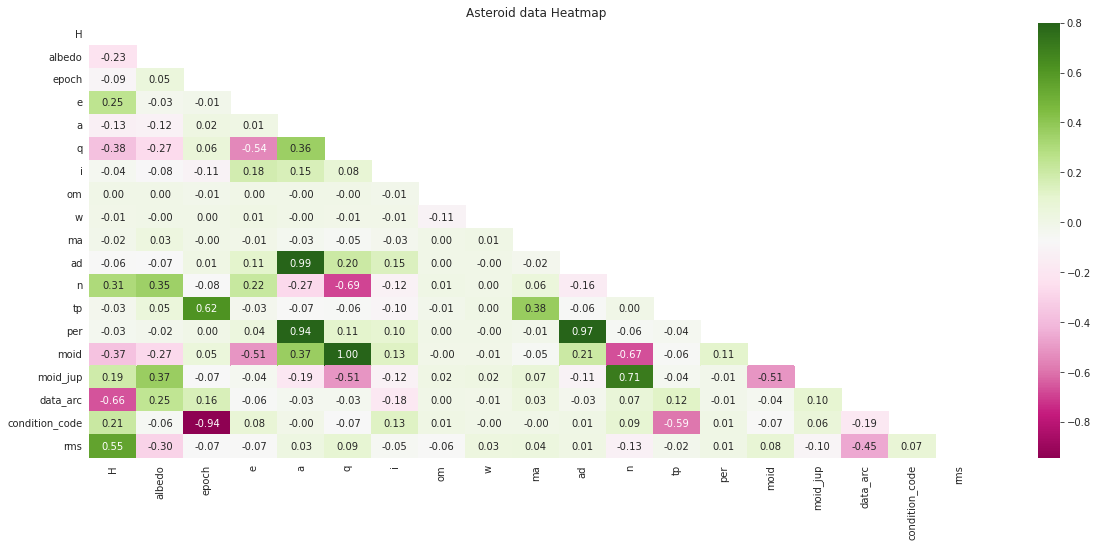

In [ ]:
#plotting heatmap for data correlation
corr_matrix =  data.drop('diameter', axis=1).corr()
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, vmax=0.8, annot=True, mask=mask, fmt='.2f', cmap="PiYG")
plt.title("Asteroid data Heatmap")
plt.show()

Observations:

- High/strong positive correlations observed between:
  - 'a' and 'ad' display high positive correlation
  - 'q' and 'moid' display high positive correlation
  - 'ad' and 'per' display high positive correlation
  - 'n' and 'moid_jupiter' display strong positive correlation 
  - epoch and 'tp' display strong positive correlation
  - 'H' and rms

- High/strong negative correlations observed between:
  - epoch and condition_code
  - 'H' and data_arc 
  - 'tp' and condition_code
  - 'n' and moid
  - moid and moid_jupiter
  - 'e' and 'q'
  - 'H' and 'data_arc'
  - 'q' and 'n'
  - data_arc and rms


- **Observed negligible or no correlation for variables 'w', 'om', 'wa'**

2. Detecting Multicollinearity using Variance Inflation Factor technique

Observing bivariate correlations of features is not enough when evaluating multicollinearity because there is potential cross correlation of three or more variables. We use here Variance Inflation Factor technique to detect multicollinearity. VIF score of 1 indicates no correlation, while score between 1 and 5 means moderately correlated, >5 is high and > 10 is very high value

In [ ]:
data_experiment = data.copy()
data_experiment.dropna(inplace=True)
y1 = data_experiment.diameter     
y2 = data_experiment.size_class
data_experiment.drop(['full_name', 'diameter', 'size_class'], axis=1, inplace=True)

In [ ]:
# need to encode catageorical variables 
data_experiment['pha'] = data_experiment.pha.apply(lambda x: 0 if x=='N' else 1)
data_experiment['neo'] = data_experiment.neo.apply(lambda x: 0 if x=='N' else 1)

In [ ]:
# encode catgeorical variable 'class' - this has got 11 categories
dummy = pd.get_dummies(data_experiment['class'], drop_first=True)

In [ ]:
# concatenating the encoding dummy with original dataframe
data_experiment = pd.concat([data_experiment, dummy], axis=1)
data_experiment.drop('class', axis=1, inplace=True)

In [ ]:
data_experiment.columns

Index(['neo', 'pha', 'H', 'albedo', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'data_arc',
       'condition_code', 'rms', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA',
       'MCA', 'OMB', 'TJN', 'TNO'],
      dtype='object')

In [ ]:
# computing variance_inflation_factor value for the independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data_experiment.values, i) for i in range(data_experiment.shape[1])]
vif_df = pd.DataFrame({'vif_value': vif}, index=data_experiment.columns).sort_values('vif_value', ascending=False)

In [ ]:
vif_df

vif_value
epoch           9.707444e+08
MBA             7.403759e+07
OMB             4.954272e+07
TJN             1.265855e+07
neo             8.127347e+06
MCA             3.976538e+06
IMB             3.048337e+06
a               1.069014e+06
ad              9.673691e+05
CEN             3.344619e+05
TNO             8.194071e+04
AST             5.461140e+04
q               3.164634e+04
moid            3.071890e+02
per             6.784970e+01
n               1.319430e+01
moid_jup        5.259566e+00
e               4.546555e+00
H               4.320281e+00
APO             4.311419e+00
ATE             3.652087e+00
data_arc        2.460106e+00
rms             1.916759e+00
condition_code  1.878699e+00
i               1.590785e+00
pha             1.581403e+00
albedo          1.563250e+00
tp              1.448299e+00
ma              1.324803e+00
om              1.021303e+00
w               1.018119e+00

In [ ]:
## plotting the vif scores 
plt.figure(figsize=(12,8))
sns.barplot(data=vif_df, x=vif_df.index, y='vif_value')
plt.xscale('log')
plt.title('VIF - Independent Continuous variable')
plt.xticks(rotation=70)
plt.show()

In [ ]:
# number of features having VIF score more than 10
print(f"Number of features with VIF score >10: {vif_df[vif_df.vif_value>10].shape[0]}") 
print(f"Number of features with VIF score >5: {vif_df[vif_df.vif_value>5].shape[0]}")
print(f"% of features with VIF score >5: {round(vif_df[vif_df.vif_value>5].shape[0]/vif_df.shape[0] * 100,2)}%")

Number of features with VIF score >10: 16
Number of features with VIF score >5: 17
% of features with VIF score >5: 54.84%


Experimenting with removing 'epoch', feature with highest VIF value. Note epoch has negligible correlation with target diameter

In [ ]:
# removing epoch from data and evaluating VIF again

data_experiment.drop('epoch', axis=1, inplace=True)
vif1 = [variance_inflation_factor(data_experiment.values, i) for i in range(data_experiment.shape[1])]
vif_df1 = pd.DataFrame({'vif_value': vif1}, index=data_experiment.columns).sort_values('vif_value', ascending=False)

In [ ]:
## plotting the correlation 
# fig = px.bar(vif_df1, x='vif_value', title='VIF - Independent Continuous variable')
# fig.update_xaxes(type='log')
# fig.show()

In [ ]:
# number of features having VIF score more than 10
print(f"Number of features with VIF score >10: {vif_df1[vif_df1.vif_value>10].shape[0]}") 
print(f"Number of features with VIF score >5: {vif_df1[vif_df1.vif_value>5].shape[0]}")
print(f"% of features with VIF score >5: {round(vif_df1[vif_df1.vif_value>5].shape[0]/vif_df1.shape[0] * 100,2)}%")

Number of features with VIF score >10: 19
Number of features with VIF score >5: 22
% of features with VIF score >5: 73.33%


Observation:
- There are 16 variable that have VIF score more than 10
- 54% of features are with VIF more than 5, (epoch feature with highest VIF value)
- Removing 'epoch' fron data did show some improvement in VIF values, but overall %of features with VIF value>5 increased from 54% to 73%
- Variables like 'epoch', 'a', 'ad', 'q', 'per', 'moid', orbit classes, neo with high VIF value indicates high collinearity with other variables
- Variables 'rms', data_arc, moid_jup, 'e', 'n', and 'H' with VIF less than 5 indicates moderate collinearity
- Variables 'w', 'om', 'conidtion_code', 'ma', 'tp', 'albedo', 'i', 'pha'with low VIF value almost close to 1 indicates little or no correlation with other variables 


Insights from Correlation and Collinearity study:
- more than 50% of feature display high multicollinearity
- we would need to address multicollinearity 


## Information Gain based evaluation of feature importance for predicting diameter

we will experiment with sklearn methods:
- sklearn.feature_selection.mutual_info_regression
- also we are making using of Binned Diameter varaiable as target and experimenting with sklearn.feature_selection.mutual_info_classif

- the above two methods returns estimated mutual information between each feature and the target 

In [ ]:
data_experiment = data.copy()
data_experiment.dropna(inplace=True)
y1 = data_experiment.diameter     
y2 = data_experiment.size_class
y3 = data_experiment.size_kbin
data_experiment.drop(['full_name', 'diameter', 'size_class', 'size_kbin'], axis=1, inplace=True)

In [ ]:
# need to encode catageorical variables 
data_experiment['pha'] = data_experiment.pha.apply(lambda x: 0 if x=='N' else 1)
data_experiment['neo'] = data_experiment.neo.apply(lambda x: 0 if x=='N' else 1)

In [ ]:
# encode catgeorical variable 'class' - this has got 11 categories
dummy = pd.get_dummies(data_experiment['class'], drop_first=True)

In [ ]:
data_experiment = pd.concat([data_experiment, dummy], axis=1)
data_experiment.drop('class', axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_information = mutual_info_regression(data_experiment, y1)
mi_df = pd.DataFrame({'mi_value':mutual_information}, index=data_experiment.columns).sort_values('mi_value', ascending=False)

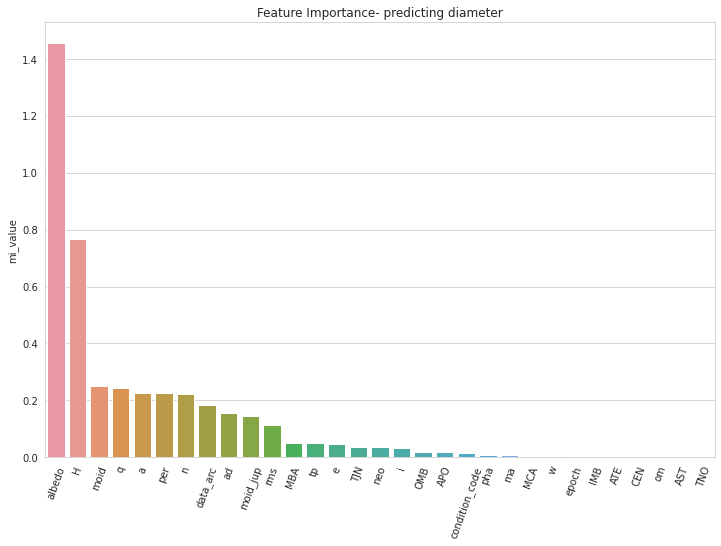

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=mi_df, x=mi_df.index, y='mi_value')
plt.title('Feature Importance- predicting diameter')
plt.xticks(rotation=70)
plt.show()

Observations:
- **Top 8 important features are - albedo, 'H', moid, 'q', 'a', 'n', per, data_arc**
- **5 least useful features - 'MCA', 'om', AST, CEN, TNO**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_information = mutual_info_classif(data_experiment, y2)
mic_df = pd.DataFrame({'mi_value':mutual_information}, index=data_experiment.columns).sort_values('mi_value', ascending=False)

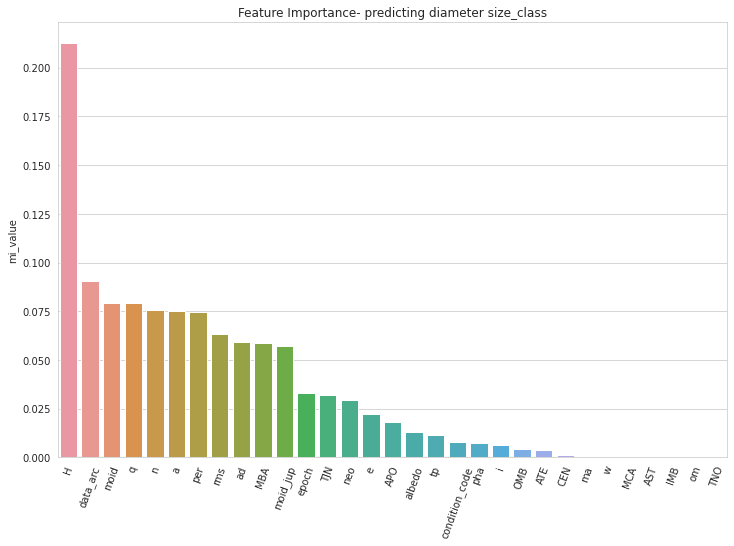

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=mic_df, x=mic_df.index, y='mi_value')
plt.title('Feature Importance- predicting diameter size_class')
plt.xticks(rotation=70)
plt.show()

Observations:
- **Top 8 important features are - 'H', data_arc, moid, per, 'q', 'a', 'n', rms**
- **5 least useful features: TNO, MCA, IMB, 'om', AST**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_information = mutual_info_classif(data_experiment, y3)
mic_df_kbin = pd.DataFrame({'mi_value':mutual_information}, index=data_experiment.columns).sort_values('mi_value', ascending=False)

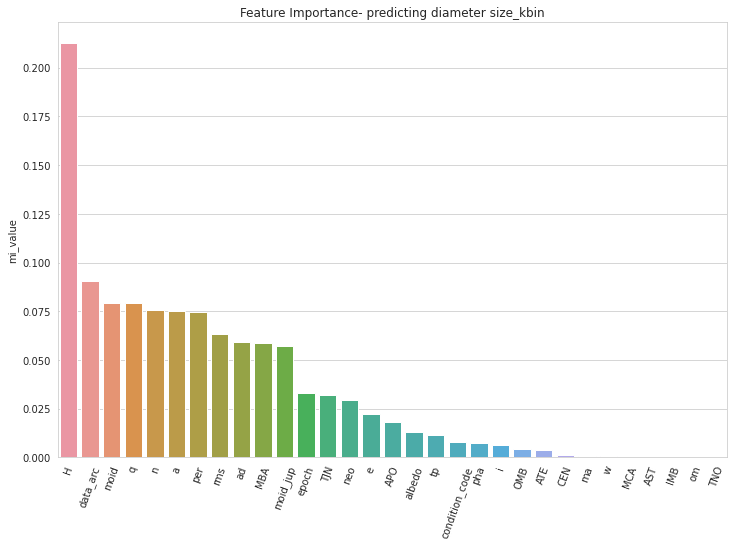

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=mic_df, x=mic_df.index, y='mi_value')
plt.title('Feature Importance- predicting diameter size_kbin')
plt.xticks(rotation=70)
plt.show()

Observation:
- **Top 8 features - 'H', data_arc, epoch, MBA, rms, per, 'a', 'n'**
- **5 features least useful - 'ma', 'APO', condition_code, 'MCA', 'om'**

## Inferences from EDA

- target **Diameter** has **skewed** distribution, we have outliers which are actual events that needs to be considered. Hence we should use a metric that does not penalizes these. we would use **mean abolute error and median absolute error**

- Continuous independent variables are of varying scale and distribution, we would need to apply **standarization** before modelling

- Among continuous features, **albedo, H, data_arc, 'ad', 'a', 'q', 'e' seems useful** for the diameter prediction based on pdf and cdf study with diameter size-class

- Continuous features **data_arc** display **strong correlation with diameter** as stated by pearson correlation coefficient value

- From CDF and PDF based study and correlation studies, we observe that - **'w', 'ma', 'om' are not important**

- CDF plot for **absolute_magnitude and data_arc display distinctly diameter size bins**

- Categorical variable **pha, neo, class** to have **strong correlation with diameter** as depicted by Cramer's V Score

- Information gain based feature importance revealed 
  - From regression based analysis - predicting diameter, we observed:
    - **Top 8 important features are - albedo, 'H', moid, 'q', 'a', 'n', per, data_arc**
    - **5 least useful features - 'MCA', 'om', AST, CEN, TNO**
  - From classification based analysis - predicting (size_class)diameter binned by size, we observed:
    - **Top 8 important features are - 'H', data_arc, moid, per, 'q', 'a', 'n', rms**
    - **5 least useful features: TNO, MCA, IMB, 'om', AST**
  - From classification based analysis - predicting (size_kbins) diameter binned by Kmeans, we observed:
    - **Top 8 features - 'H', data_arc, epoch, MBA, rms, per, 'a', 'n'**
    - **5 features least useful - 'ma', 'APO', condition_code, 'MCA', 'om'**

- 54% of features have high VIF score depicting high multicollinearity, which means our features are not orthogonal

- Variables like **'epoch', 'a', 'ad', 'q', 'per', 'moid', orbit classes, neo **with high VIF value indicates **high collinearity** with other variables


